In [22]:
# ---------------------------------------------------------------------
# Imports
# ---------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys, os

sys.path.append(os.path.abspath(".."))

from energy.strategies.rolling import rolling_pnl, roll_EL, RollingStrategy
from energy.strategies.momentum import momentum
from energy.strategies.carry import carry
from energy.analytics.metrics import metrics
from energy.preprocess.expiry_calendar import expiry_calendar  # or others
from energy.preprocess.read_data import read_data  # if you built a loader
from energy.preprocess.drop_dupes import drop_dupes


plt.style.use("seaborn-v0_8-whitegrid")

data_path = "../data/Commods.xlsx"
calendar_path = "../data/expiry_calendars.xlsx"


In [23]:

cutoff = pd.Timestamp("2022-01-04")

# Commodity parameters:
# name : (ticker, contracts, units, t_cost)
COMMODITIES = {
    "Propane": ("BAP", 100, 42000, 0.001),
    "Ethane":  ("CAP", 100, 42000, 0.001),
    "Butane":  ("DAE", 100, 42000, 0.001),
    "WTI":     ("CL", 100, 1000, 0.01),
    "Brent":   ("CO", 100, 1000, 0.01),
    "ULSD":    ("HO", 100, 42000, 0.05),
    "RBOB":    ("XB", 100, 42000, 0.05),
    "Gasoil": ("QS", 100, 100, 0.5),
    "Natgas":  ("NG", 100, 10000, 0.001),
}

roll_window = 6

=== Propane (BAP) | t_cost=0.001 ===
Found sheet 'Propane (BAP)' for BAP


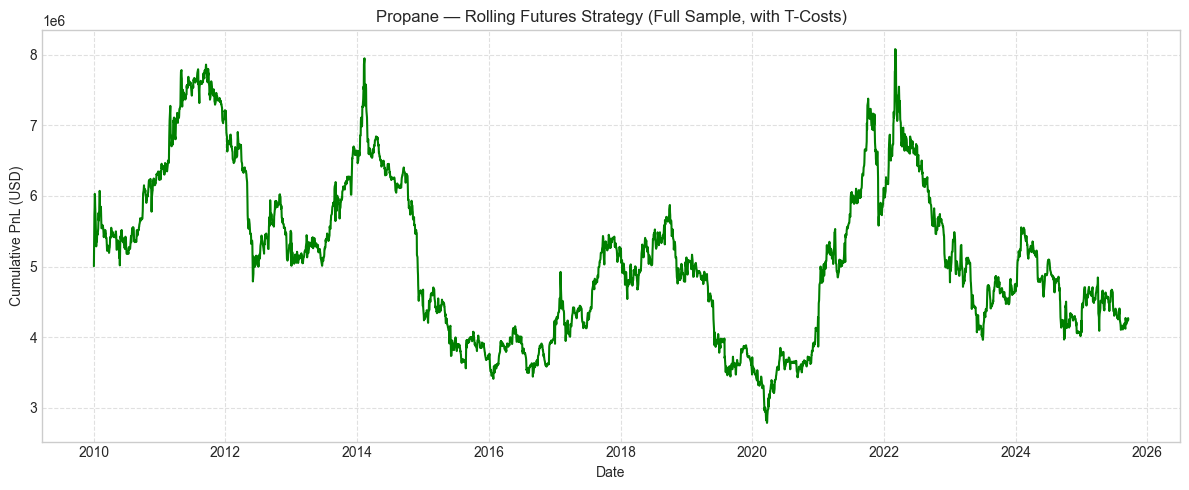

----- Propane — Rolling Futures Metrics (Full Sample, USD) -----


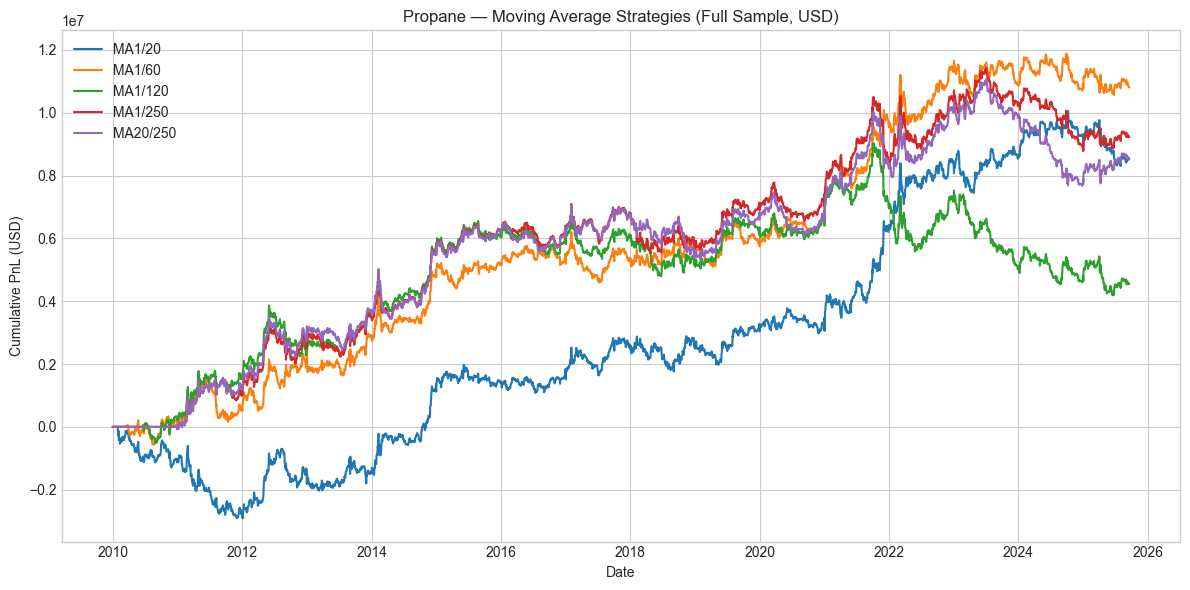

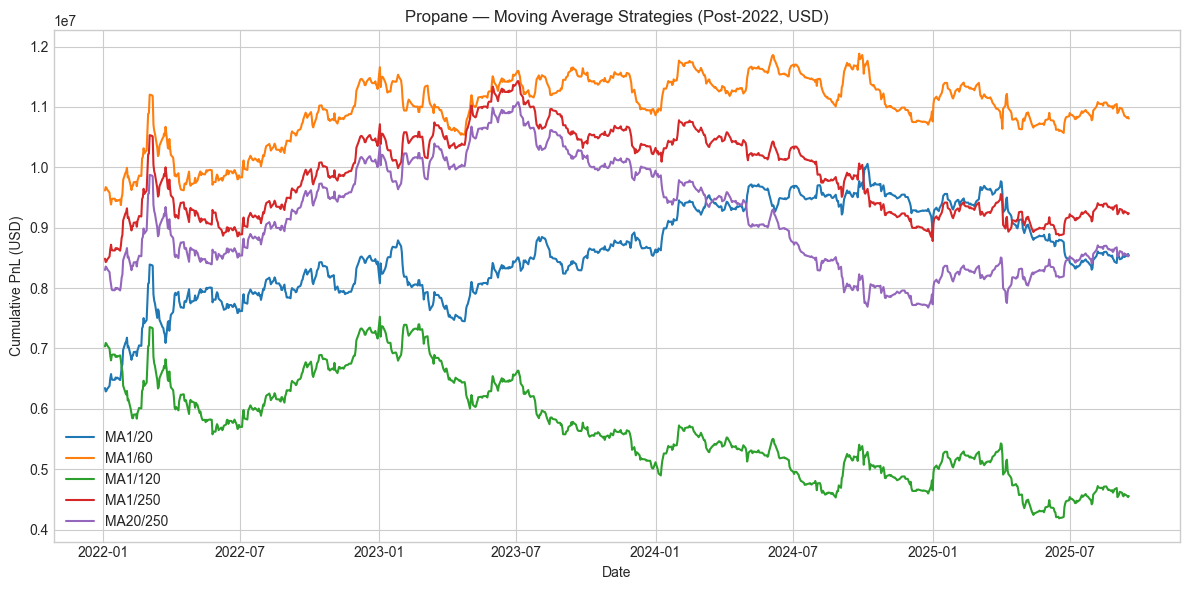

----- Propane — MA Strategy Metrics (Full / Pre / Post, USD) -----

MA1/20



MA1/60



MA1/120



MA1/250



MA20/250


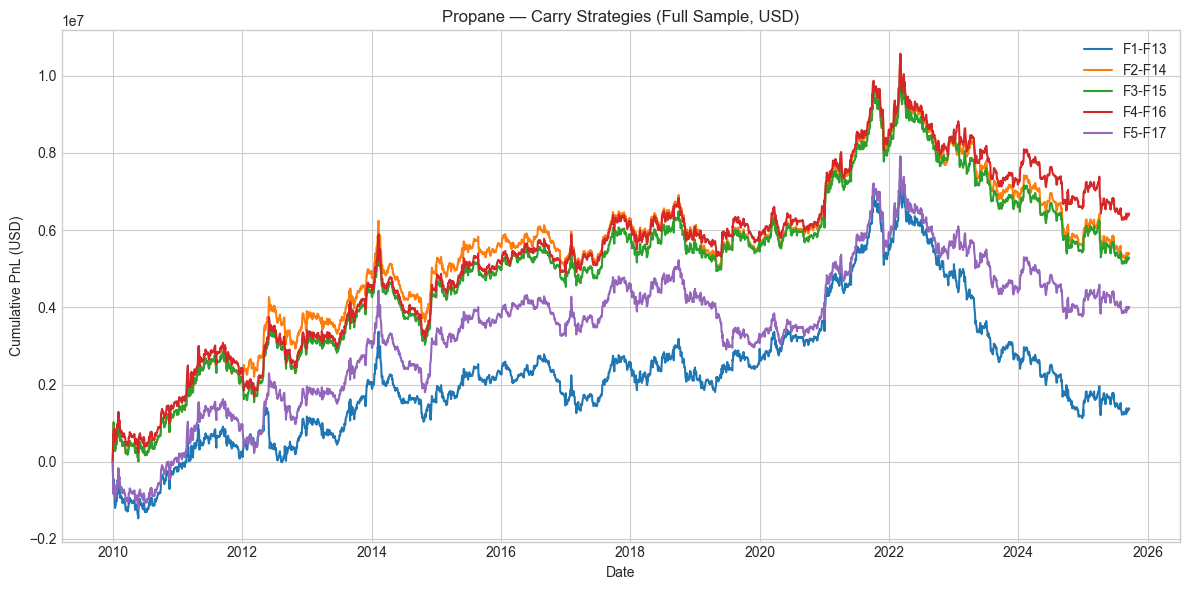

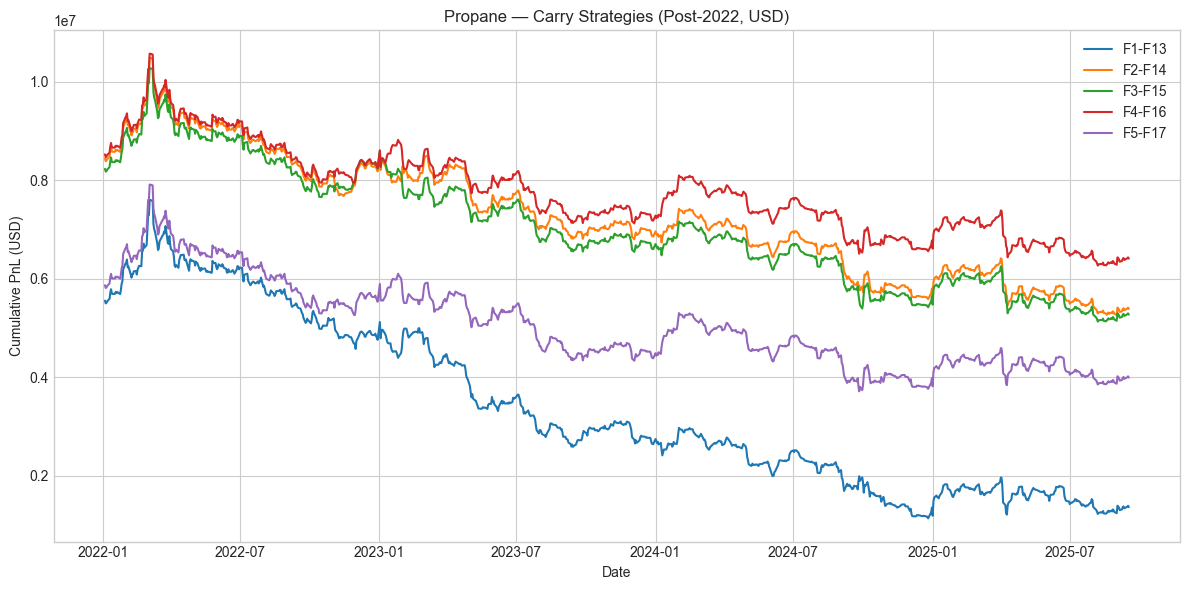

----- Propane — Carry Strategy Metrics (Full / Pre / Post, USD) -----

F1-F13



F2-F14



F3-F15



F4-F16



F5-F17


===== Completed Propane (BAP) =====


=== Ethane (CAP) | t_cost=0.001 ===
Found sheet 'Ethane (CAP)' for CAP


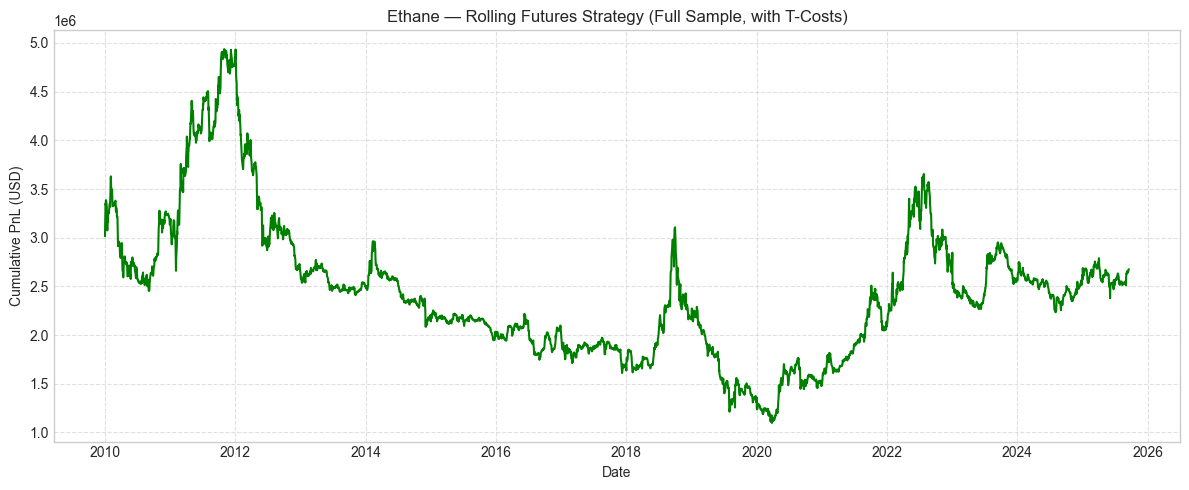

----- Ethane — Rolling Futures Metrics (Full Sample, USD) -----


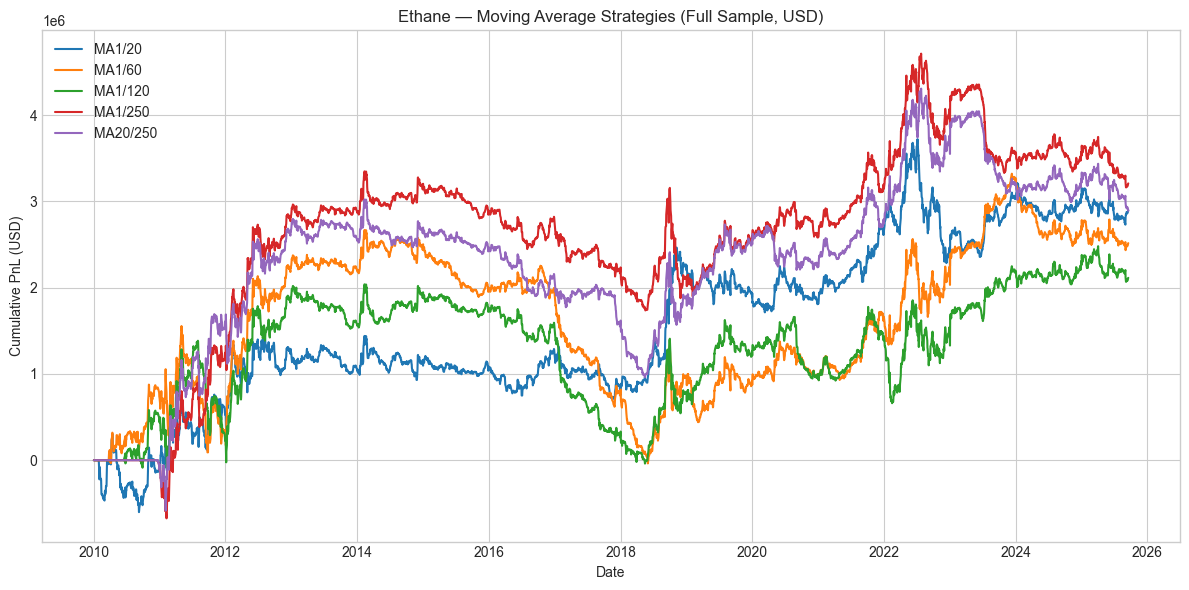

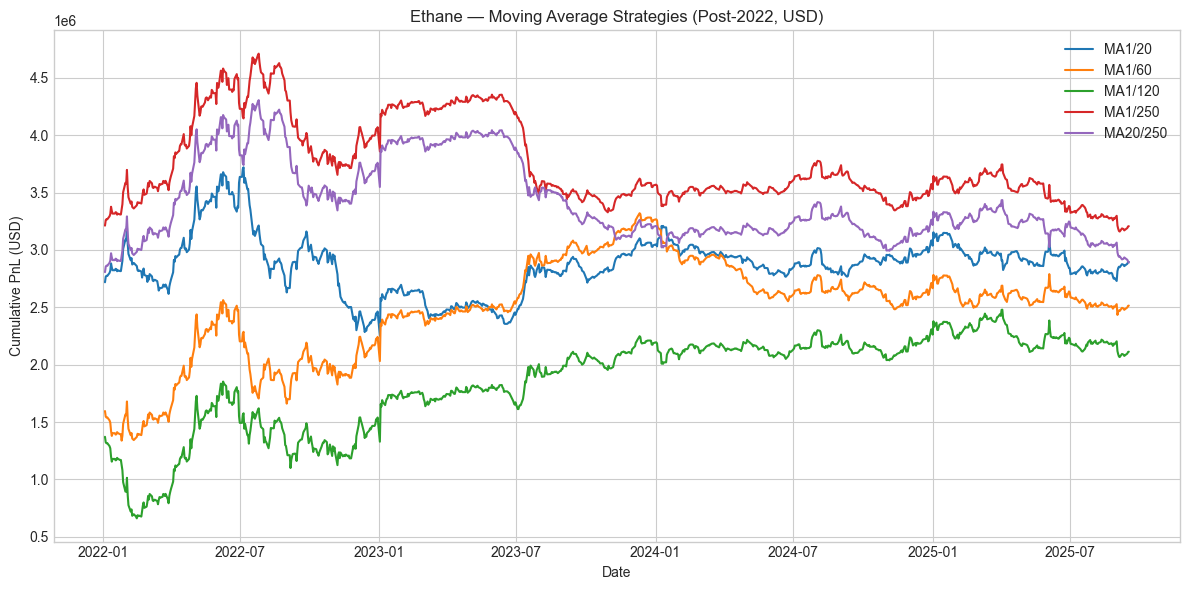

----- Ethane — MA Strategy Metrics (Full / Pre / Post, USD) -----

MA1/20



MA1/60



MA1/120



MA1/250



MA20/250


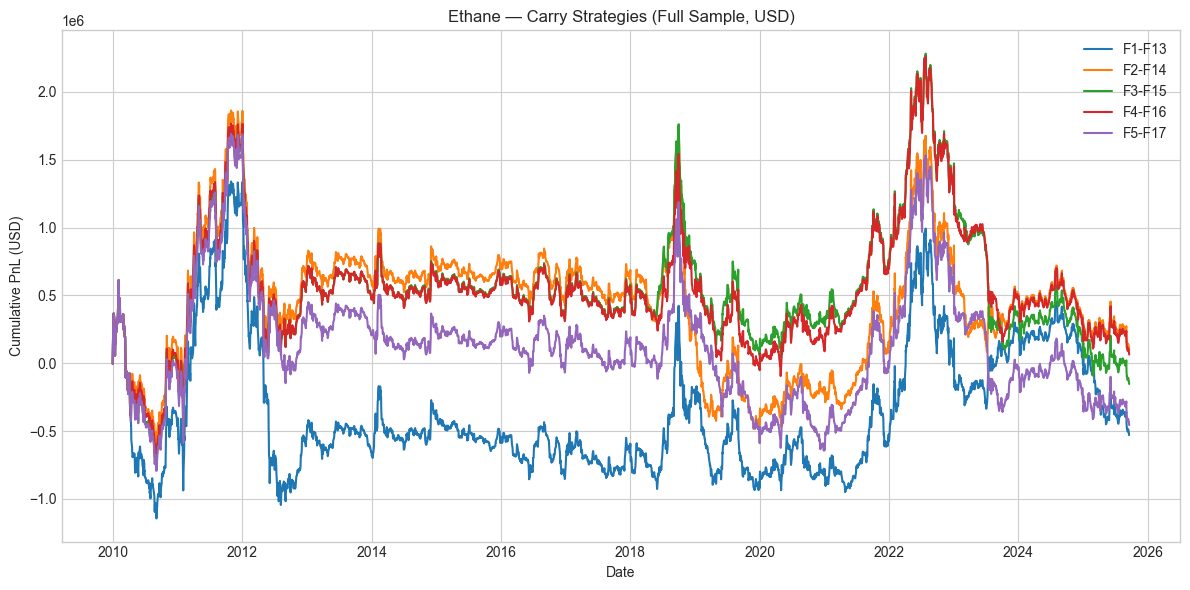

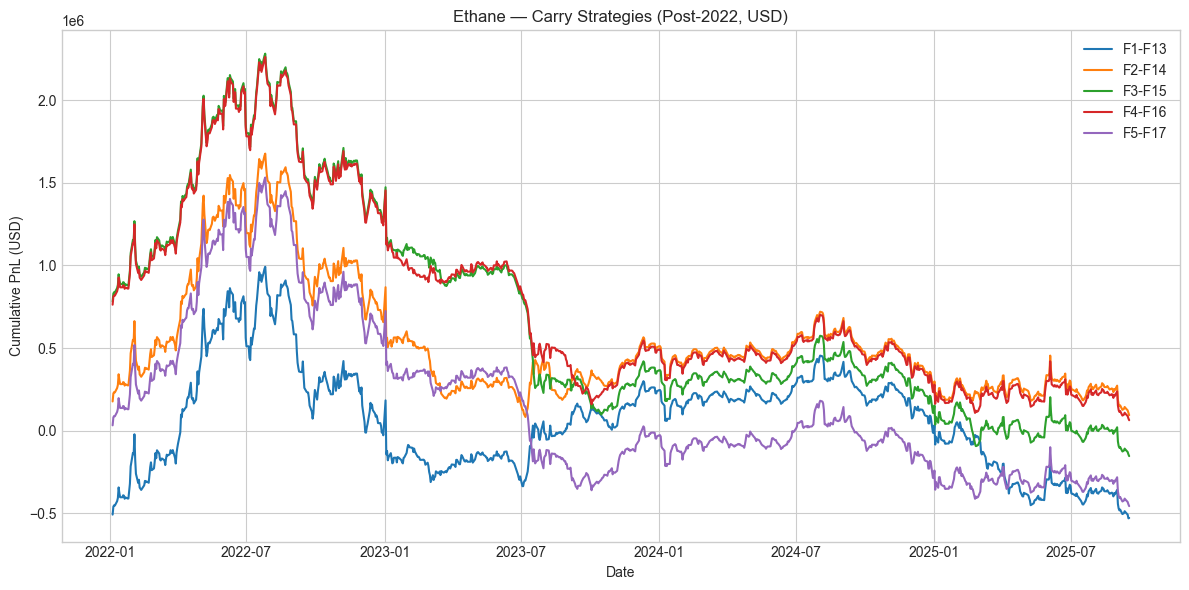

----- Ethane — Carry Strategy Metrics (Full / Pre / Post, USD) -----

F1-F13



F2-F14



F3-F15



F4-F16



F5-F17


===== Completed Ethane (CAP) =====


=== Butane (DAE) | t_cost=0.001 ===
Found sheet 'Butane (DAE)' for DAE


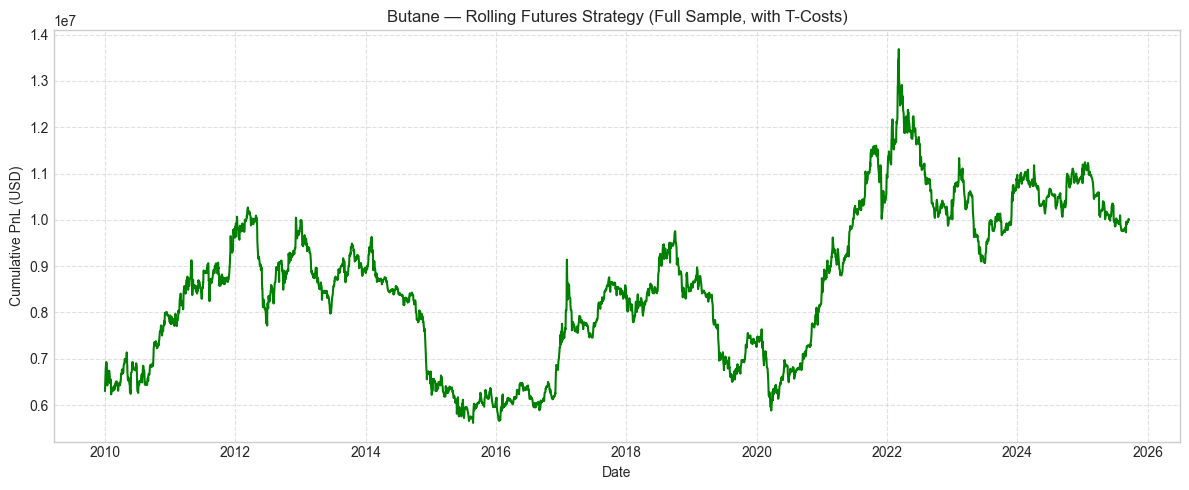

----- Butane — Rolling Futures Metrics (Full Sample, USD) -----


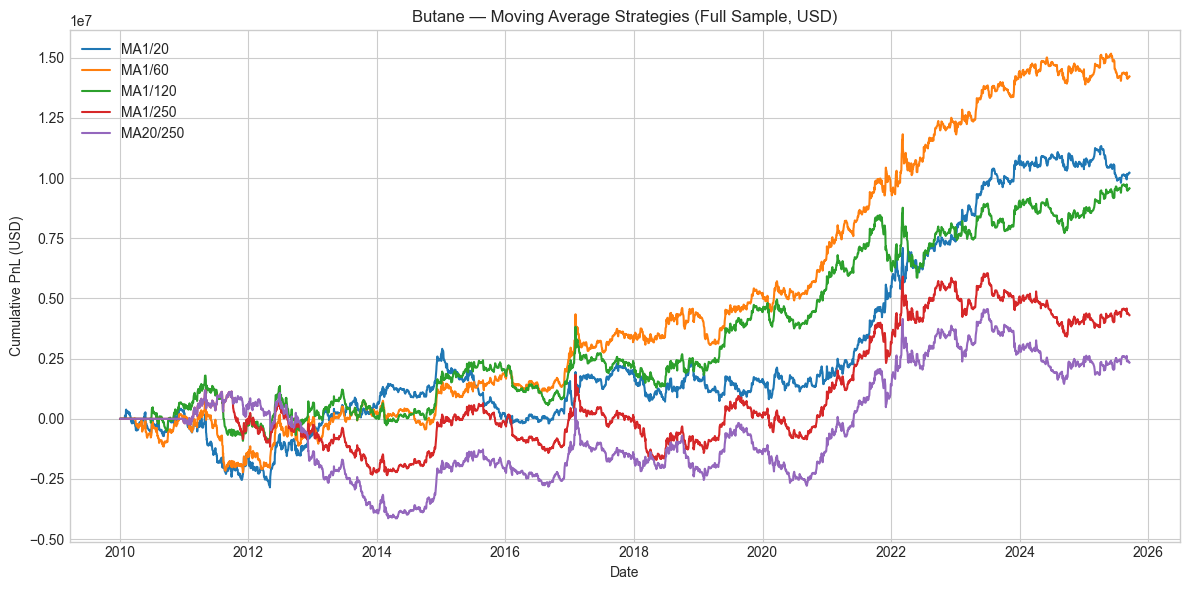

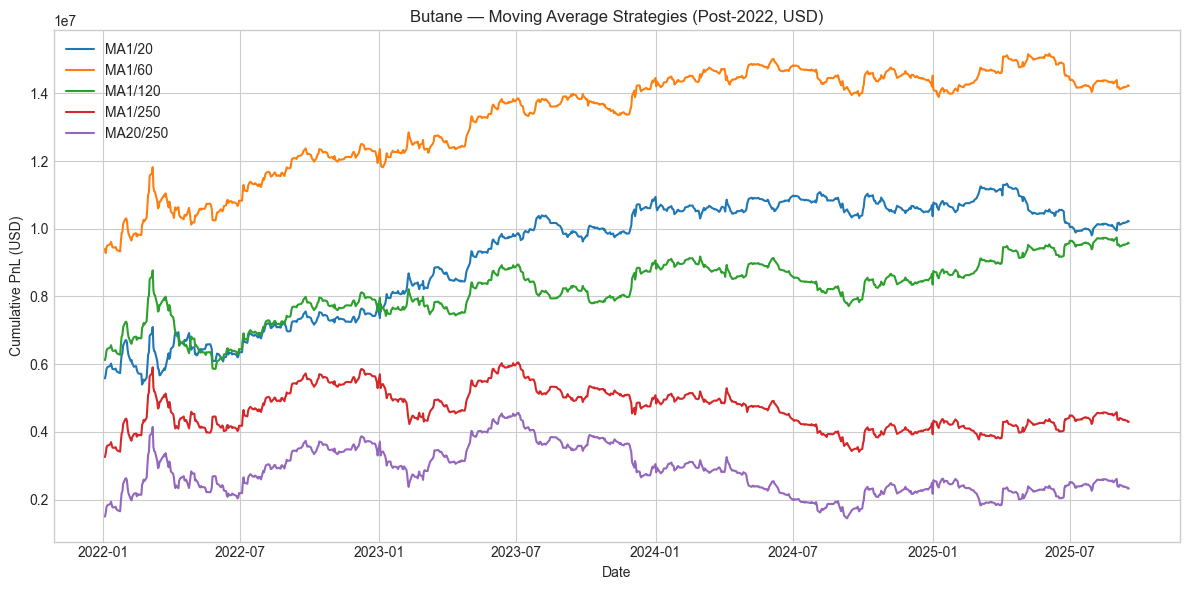

----- Butane — MA Strategy Metrics (Full / Pre / Post, USD) -----

MA1/20



MA1/60



MA1/120



MA1/250



MA20/250


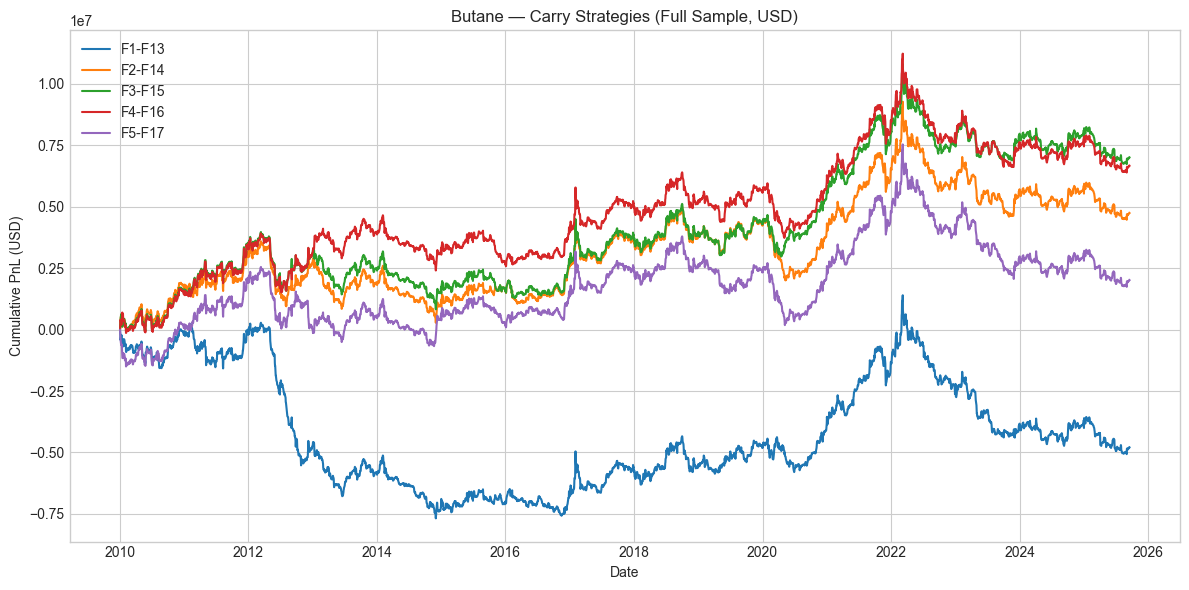

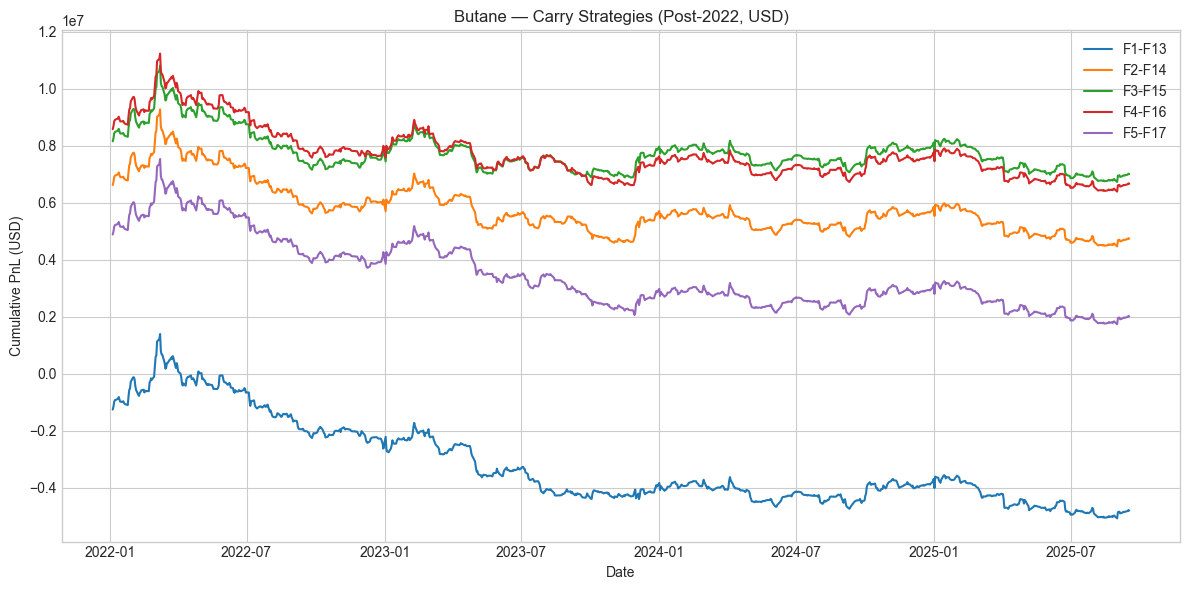

----- Butane — Carry Strategy Metrics (Full / Pre / Post, USD) -----

F1-F13



F2-F14



F3-F15



F4-F16



F5-F17


===== Completed Butane (DAE) =====


=== WTI (CL) | t_cost=0.01 ===
Found sheet 'WTI (CL)' for CL


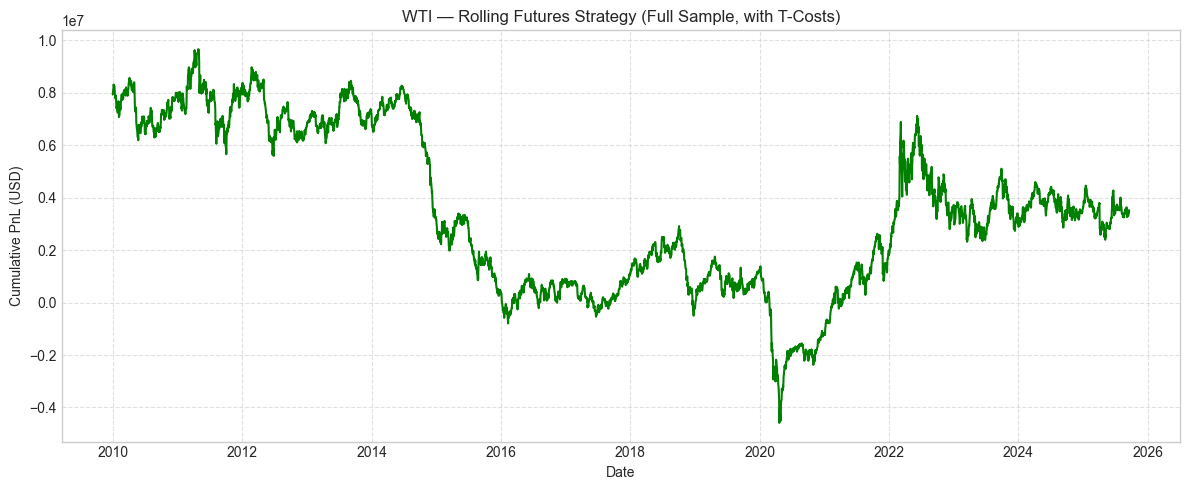

----- WTI — Rolling Futures Metrics (Full Sample, USD) -----


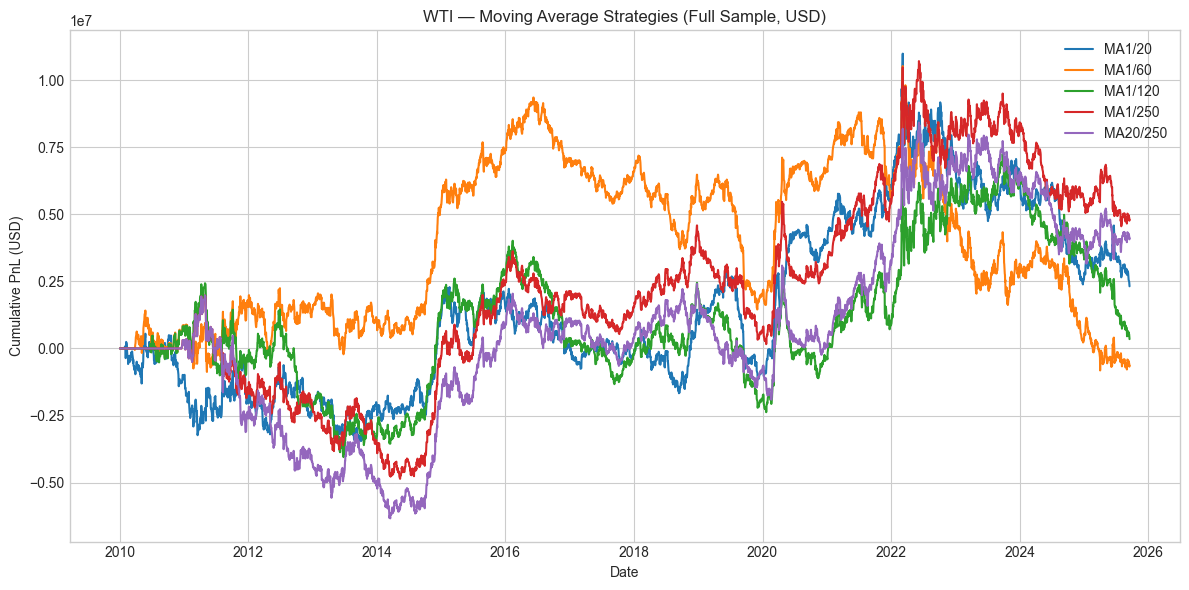

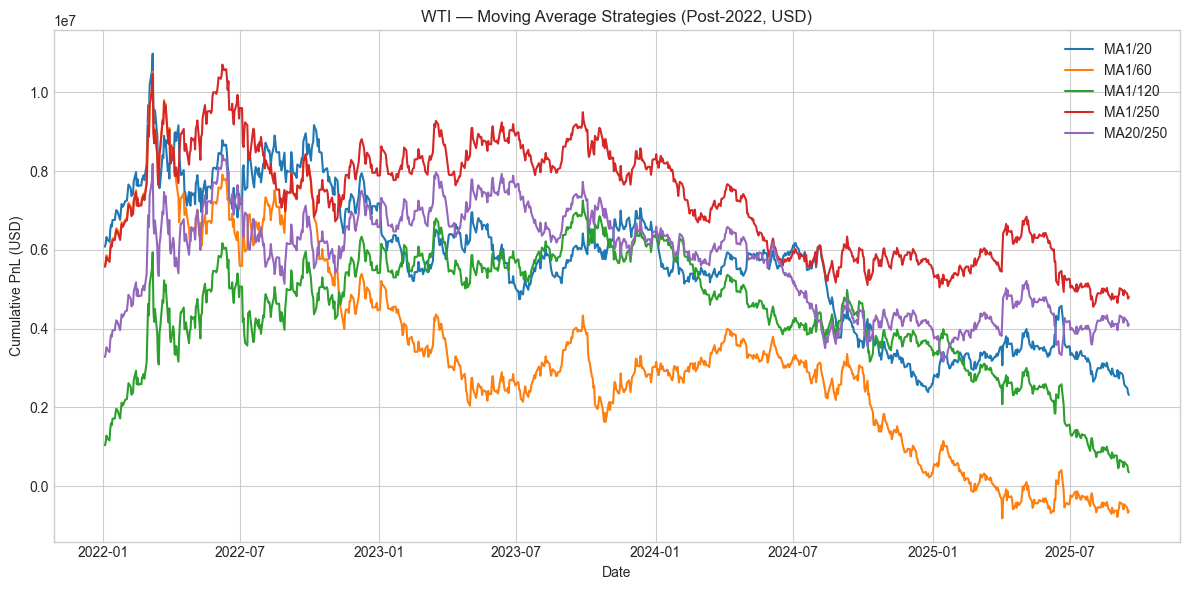

----- WTI — MA Strategy Metrics (Full / Pre / Post, USD) -----

MA1/20



MA1/60



MA1/120



MA1/250



MA20/250


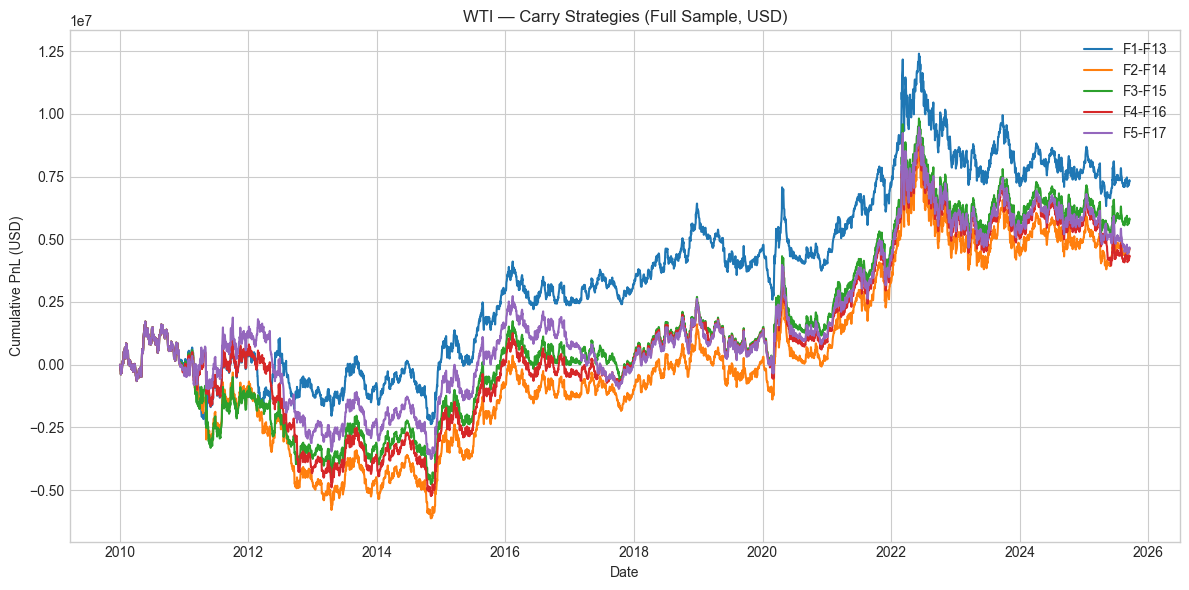

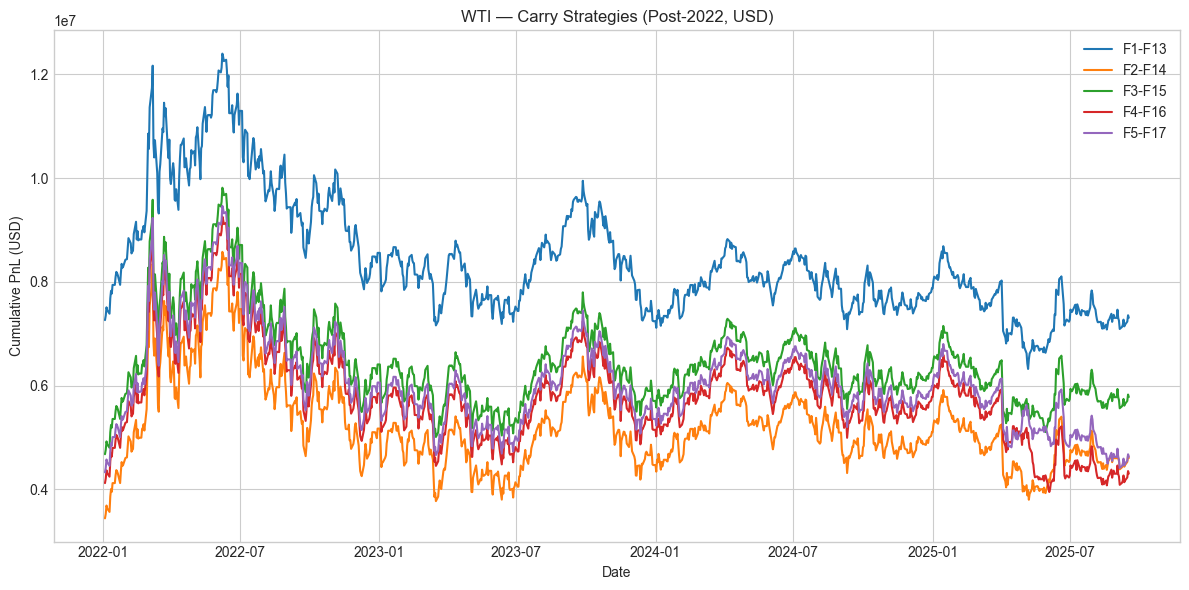

----- WTI — Carry Strategy Metrics (Full / Pre / Post, USD) -----

F1-F13



F2-F14



F3-F15



F4-F16



F5-F17


===== Completed WTI (CL) =====


=== Brent (CO) | t_cost=0.01 ===
Found sheet 'Brent (CO)' for CO


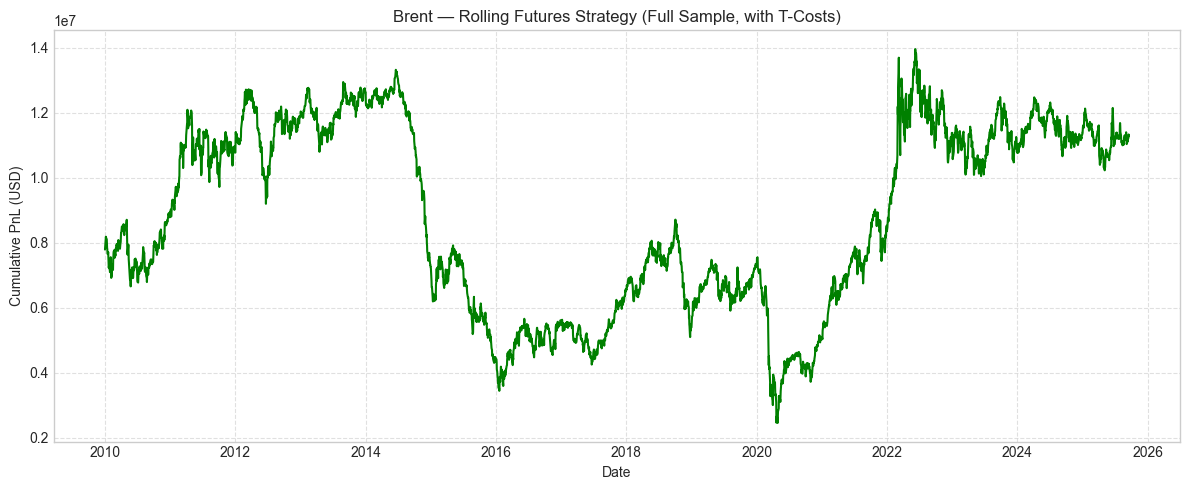

----- Brent — Rolling Futures Metrics (Full Sample, USD) -----


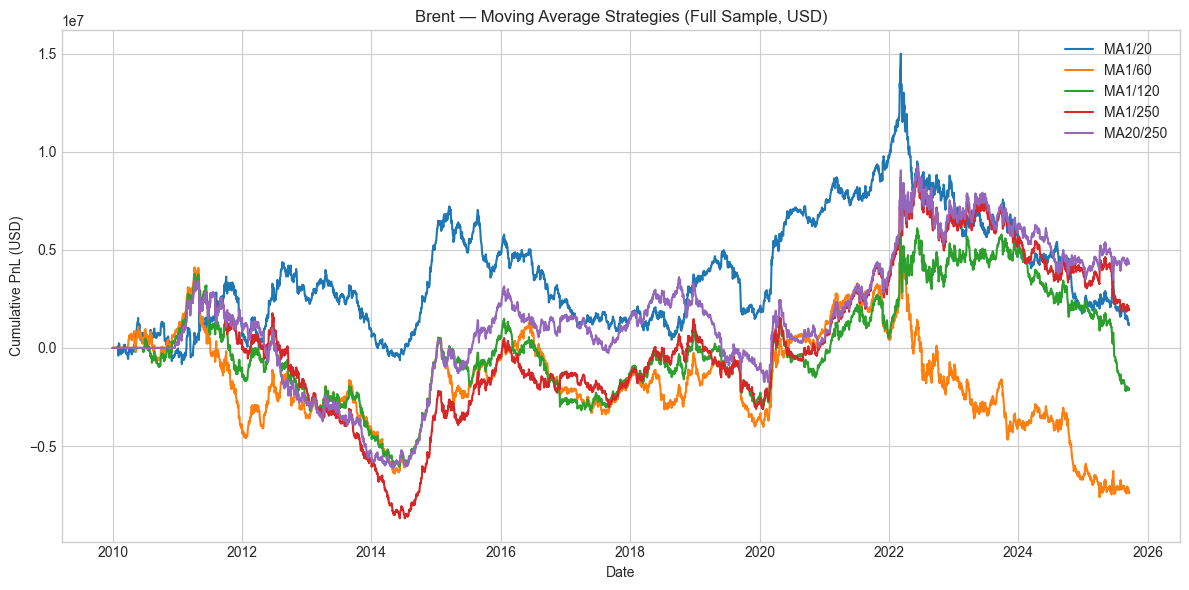

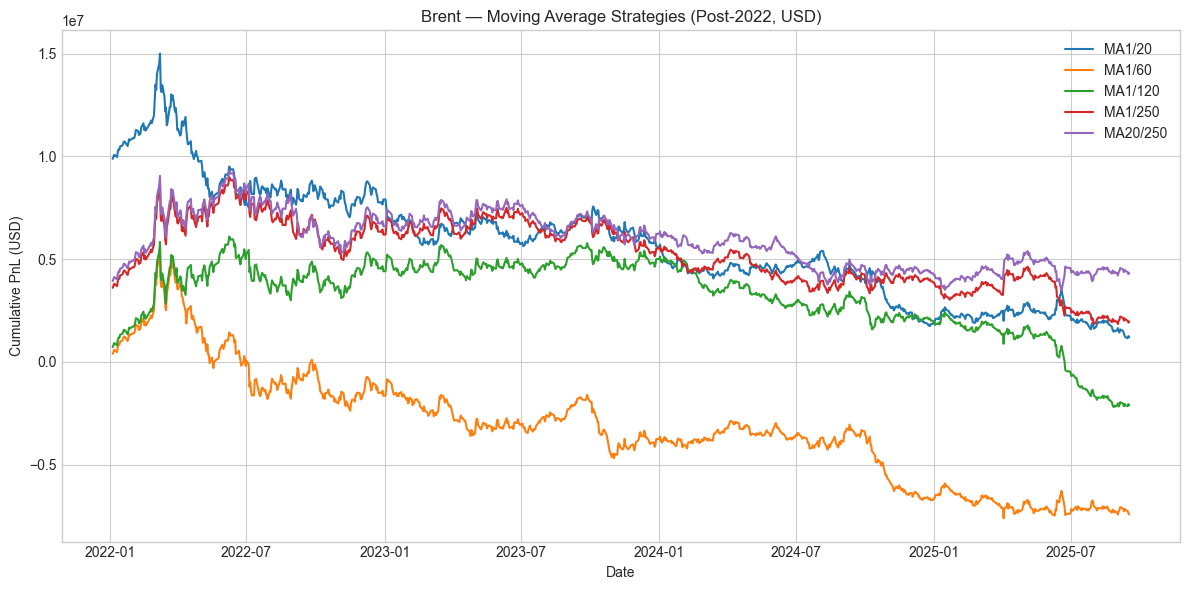

----- Brent — MA Strategy Metrics (Full / Pre / Post, USD) -----

MA1/20



MA1/60



MA1/120



MA1/250



MA20/250


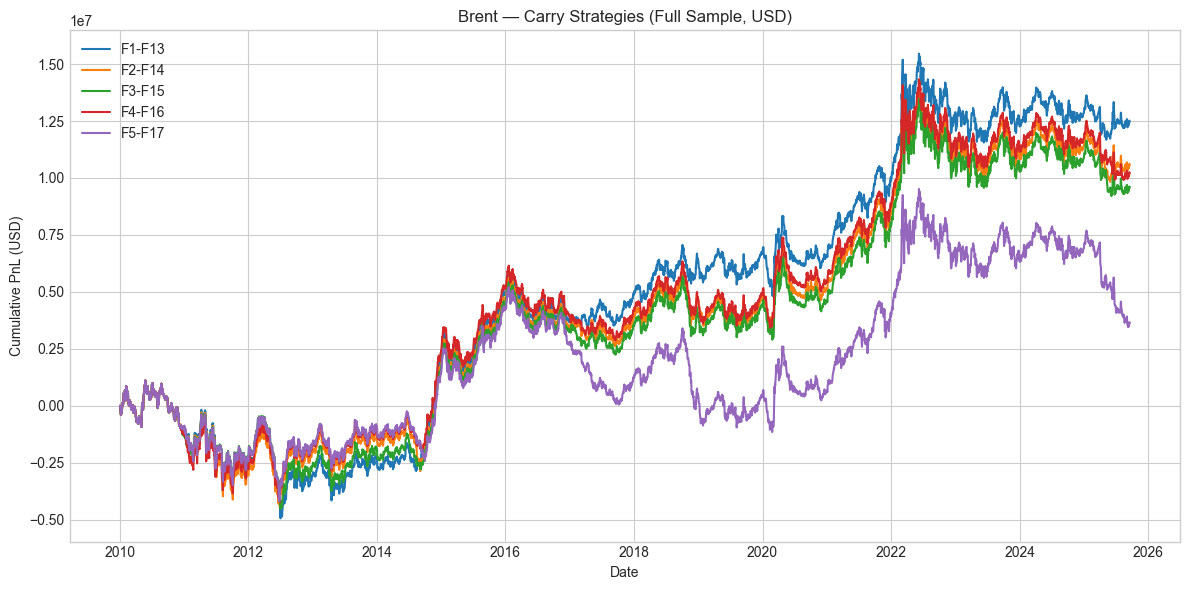

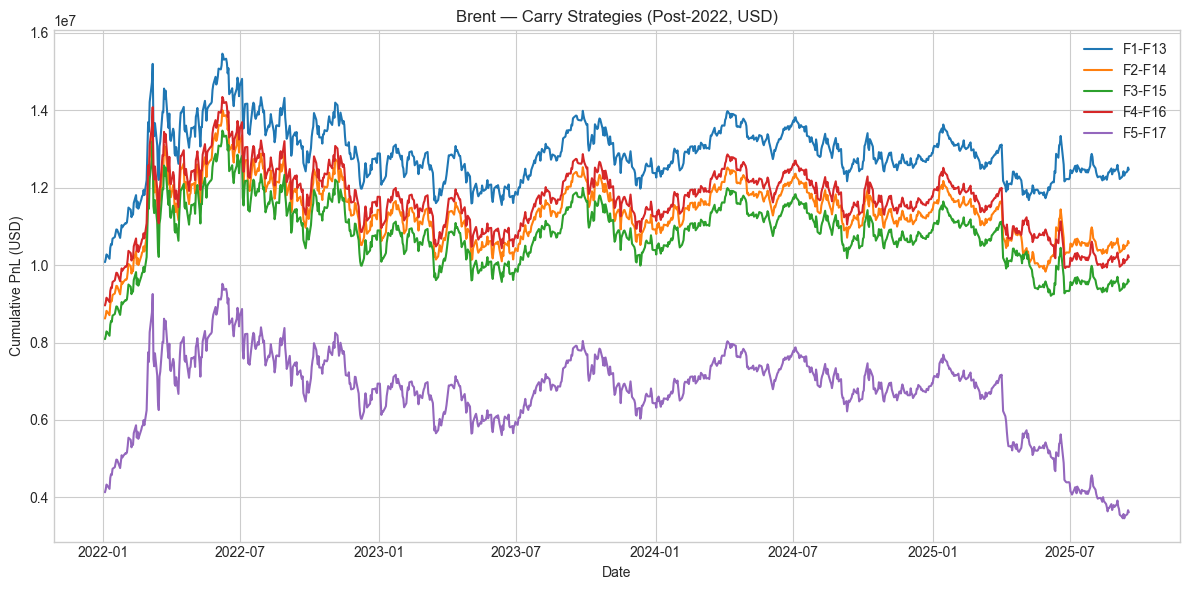

----- Brent — Carry Strategy Metrics (Full / Pre / Post, USD) -----

F1-F13



F2-F14



F3-F15



F4-F16



F5-F17


===== Completed Brent (CO) =====


=== ULSD (HO) | t_cost=0.05 ===
Found sheet 'ULSD (HO)' for HO


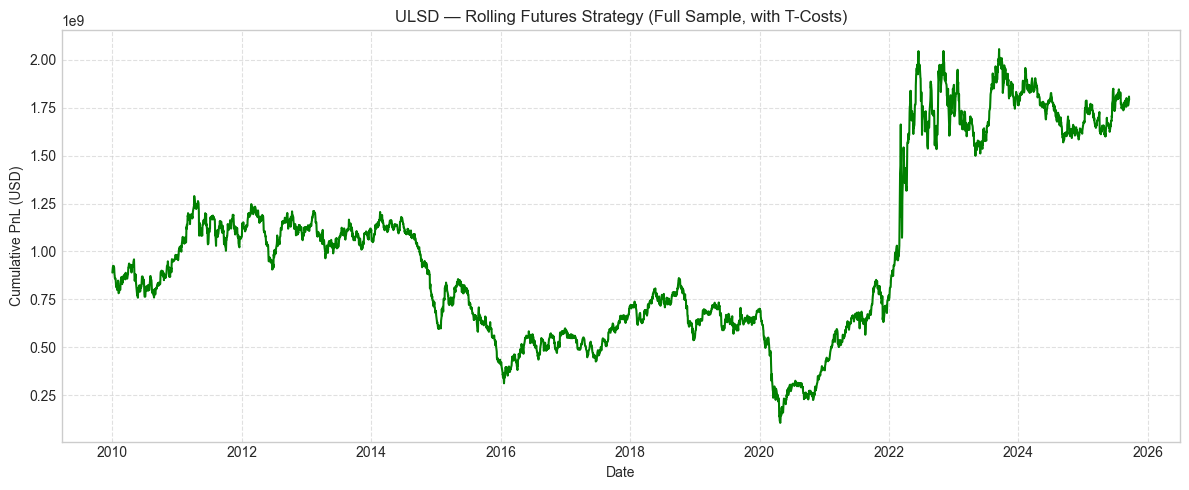

----- ULSD — Rolling Futures Metrics (Full Sample, USD) -----


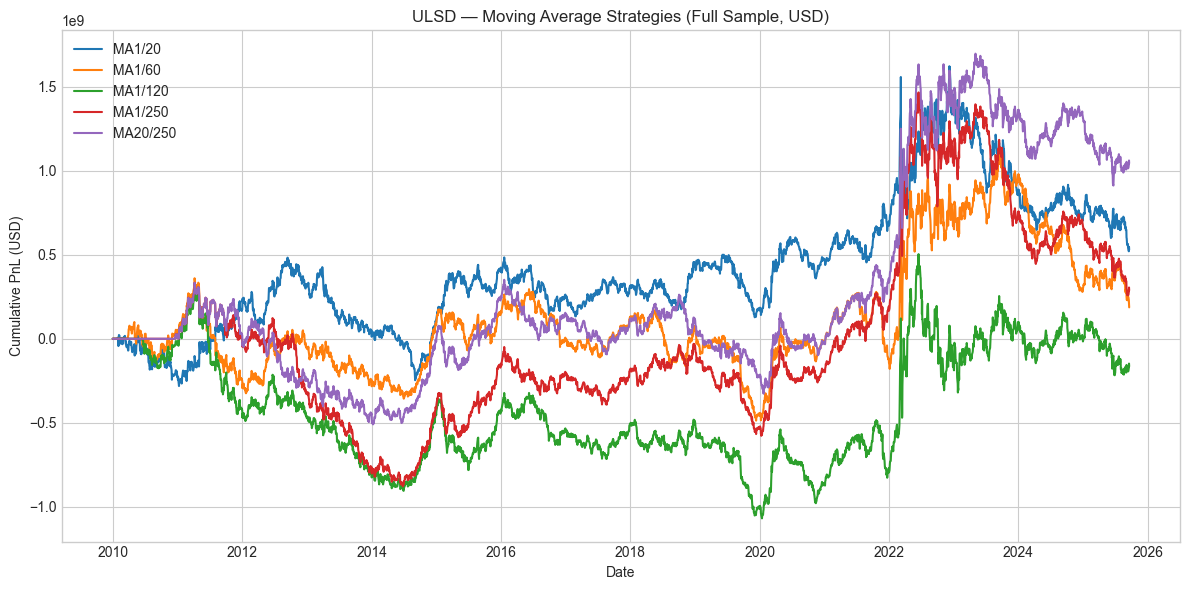

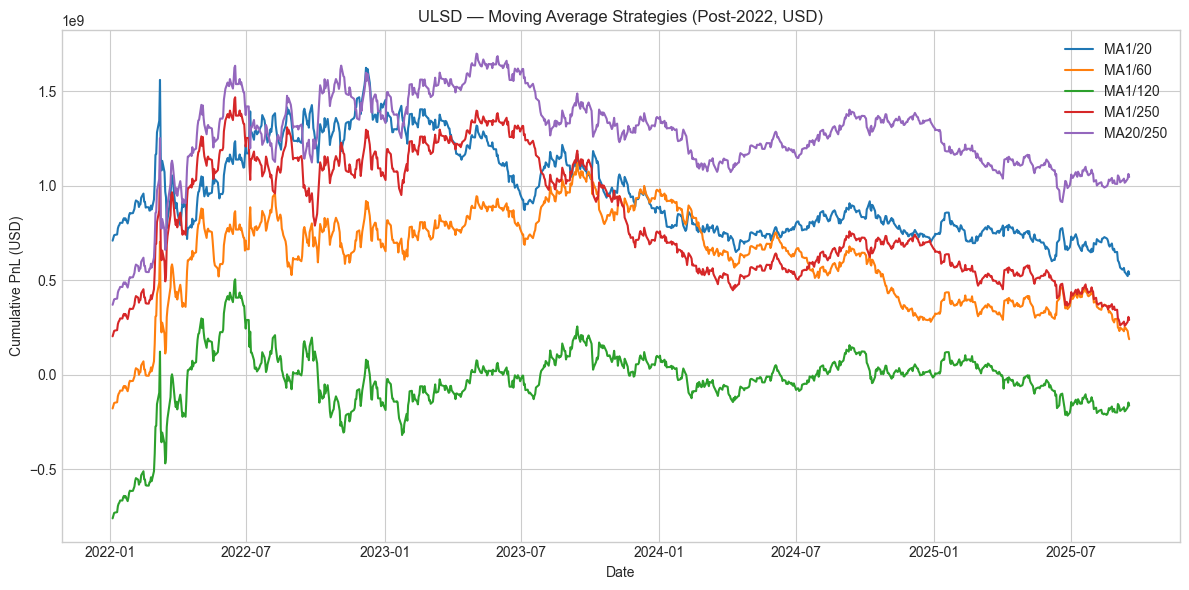

----- ULSD — MA Strategy Metrics (Full / Pre / Post, USD) -----

MA1/20



MA1/60



MA1/120



MA1/250



MA20/250


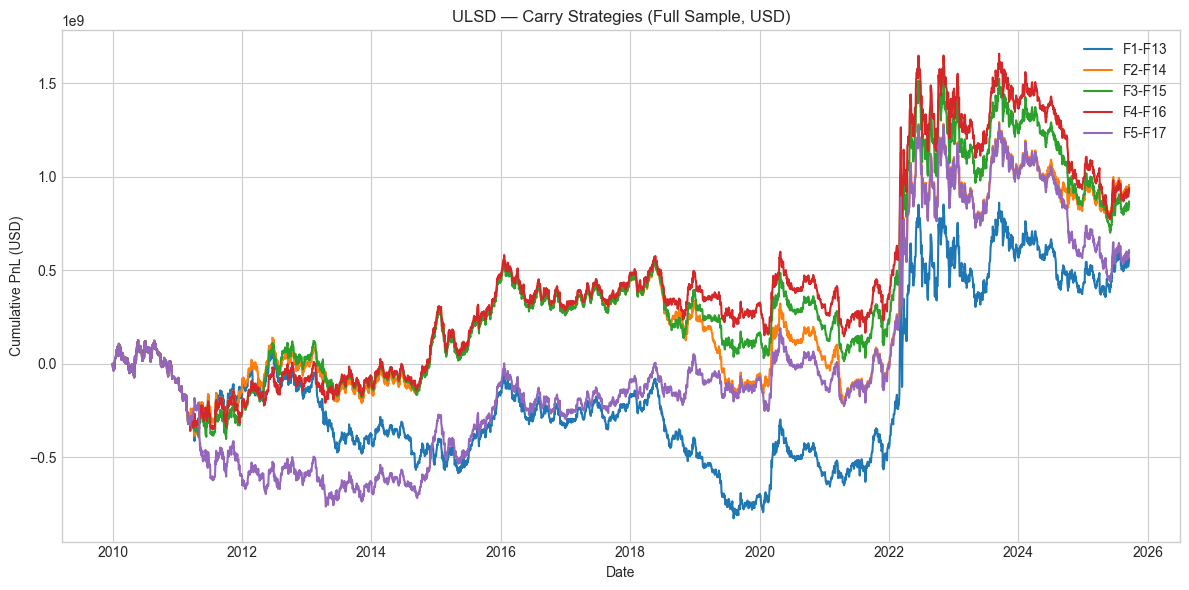

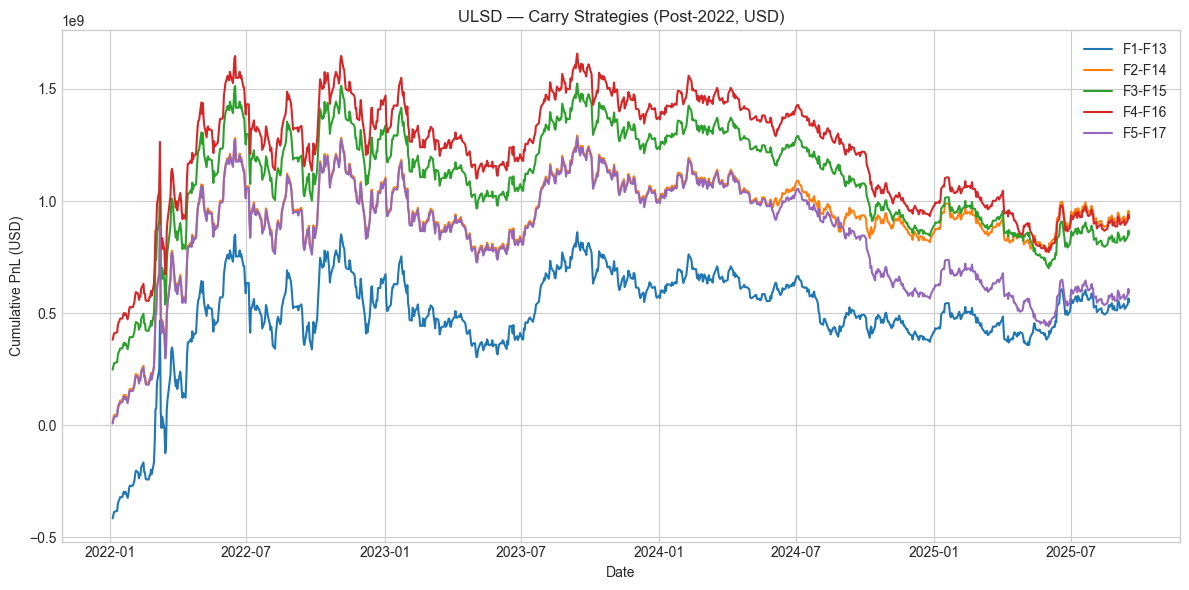

----- ULSD — Carry Strategy Metrics (Full / Pre / Post, USD) -----

F1-F13



F2-F14



F3-F15



F4-F16



F5-F17


===== Completed ULSD (HO) =====


=== RBOB (XB) | t_cost=0.05 ===
Found sheet 'RBOB (XB)' for XB


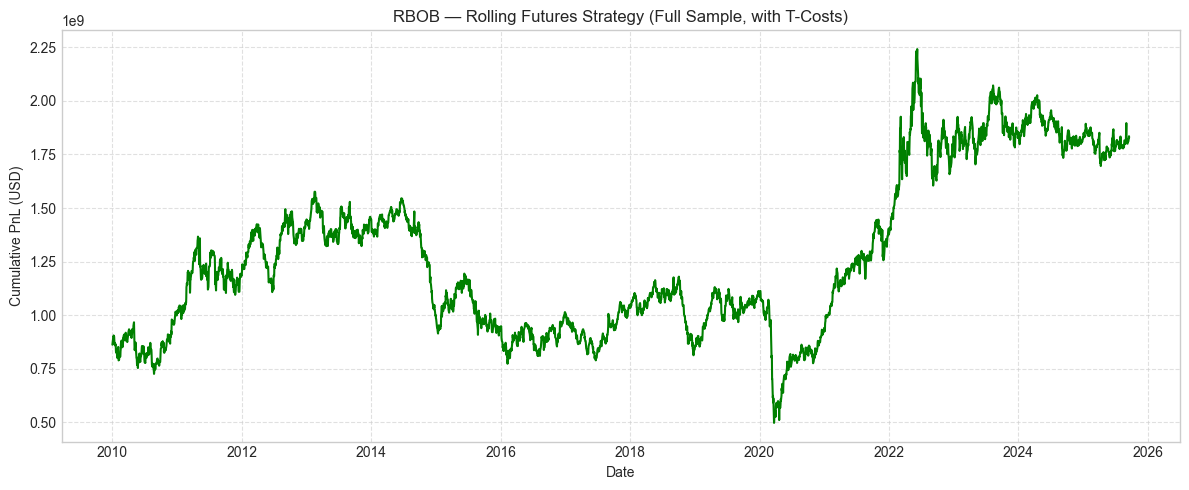

----- RBOB — Rolling Futures Metrics (Full Sample, USD) -----


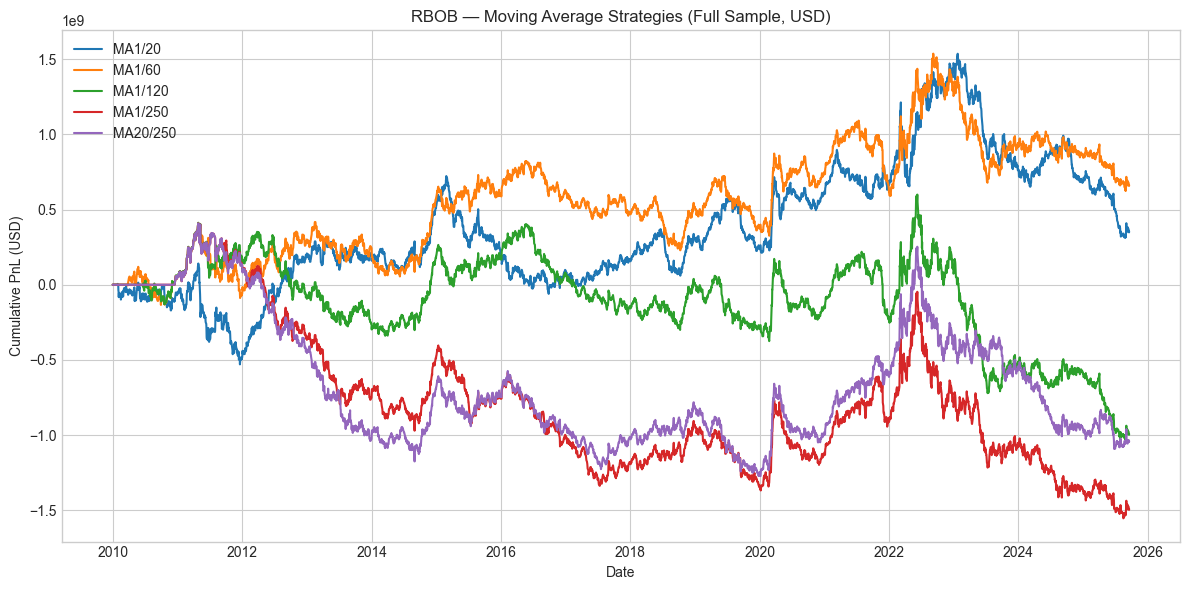

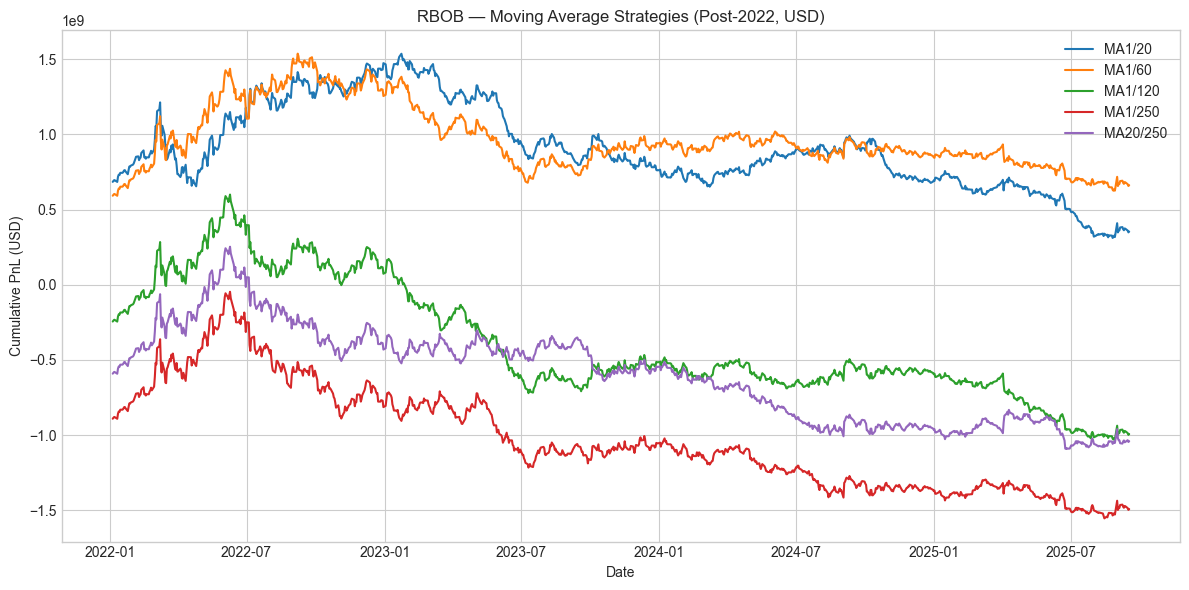

----- RBOB — MA Strategy Metrics (Full / Pre / Post, USD) -----

MA1/20



MA1/60



MA1/120



MA1/250



MA20/250


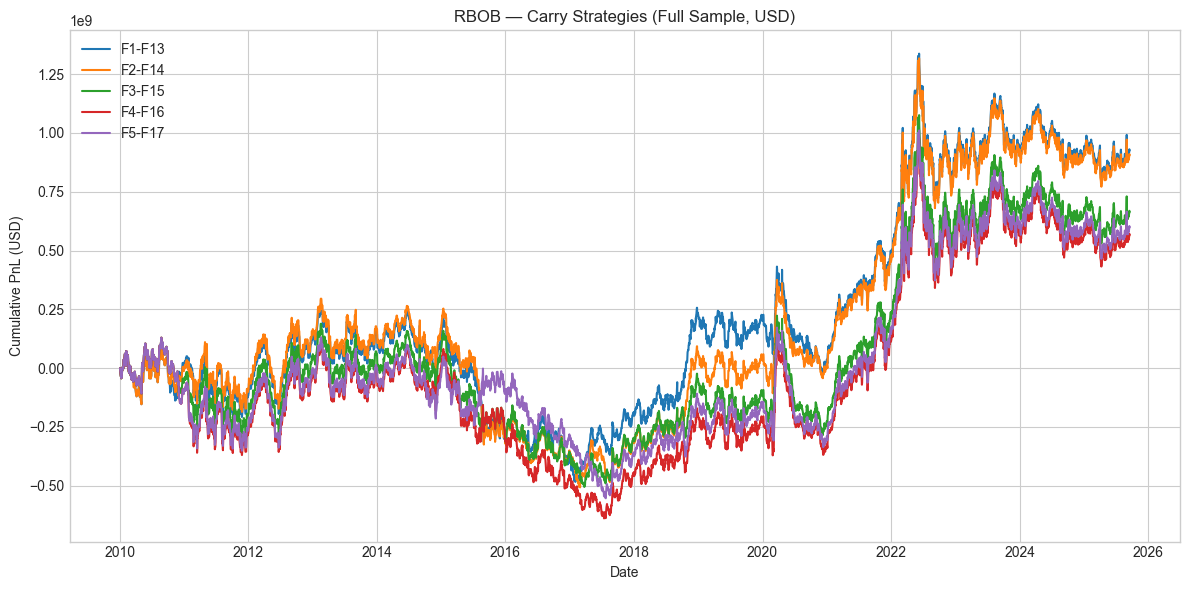

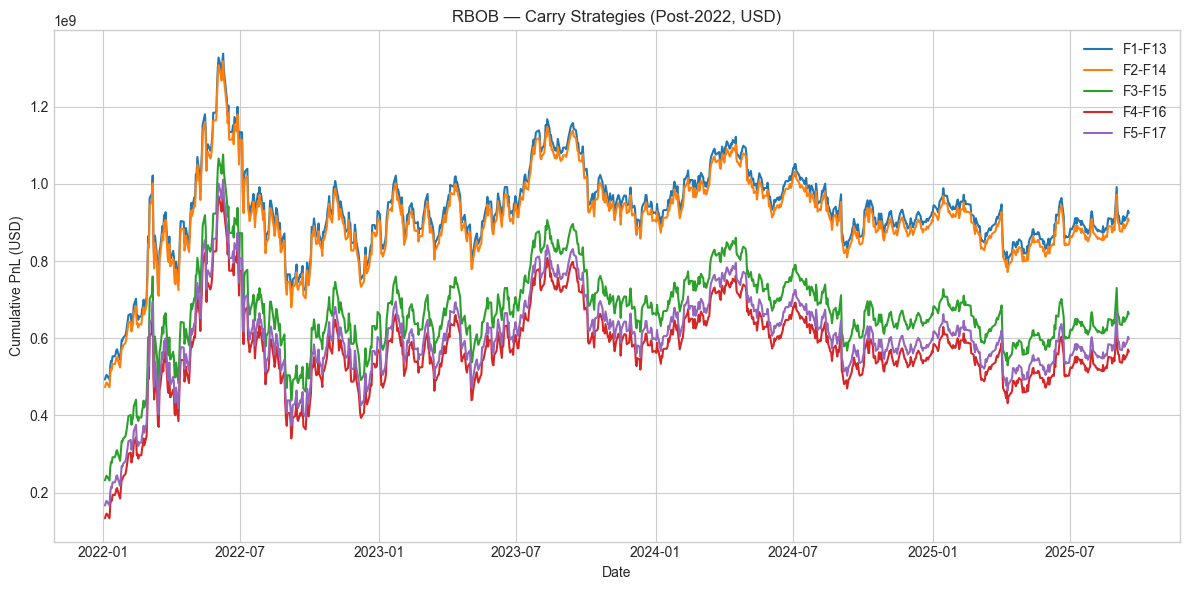

----- RBOB — Carry Strategy Metrics (Full / Pre / Post, USD) -----

F1-F13



F2-F14



F3-F15



F4-F16



F5-F17


===== Completed RBOB (XB) =====


=== Gasoil (QS) | t_cost=0.5 ===
Found sheet 'Gasoil (QS)' for QS


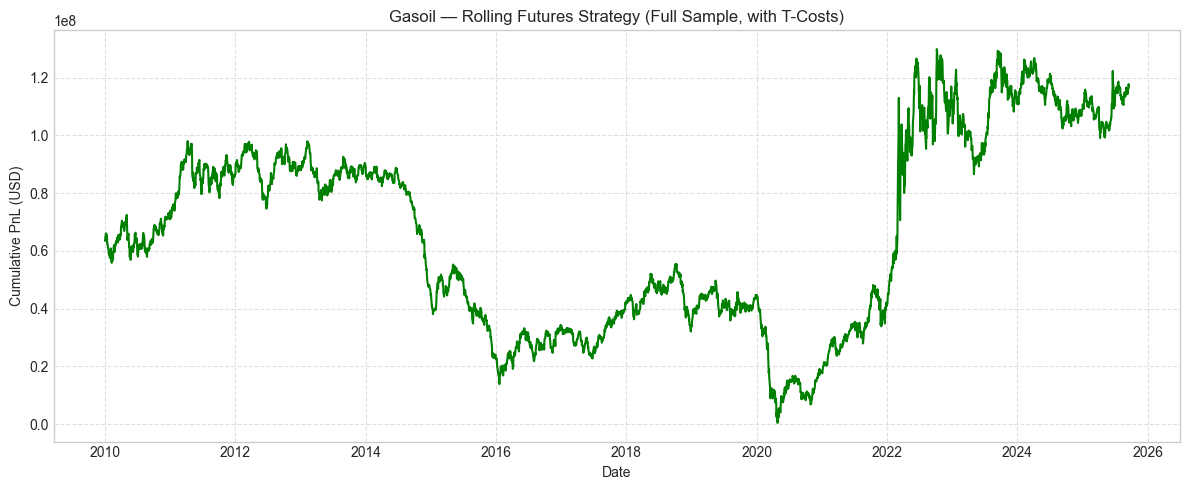

----- Gasoil — Rolling Futures Metrics (Full Sample, USD) -----


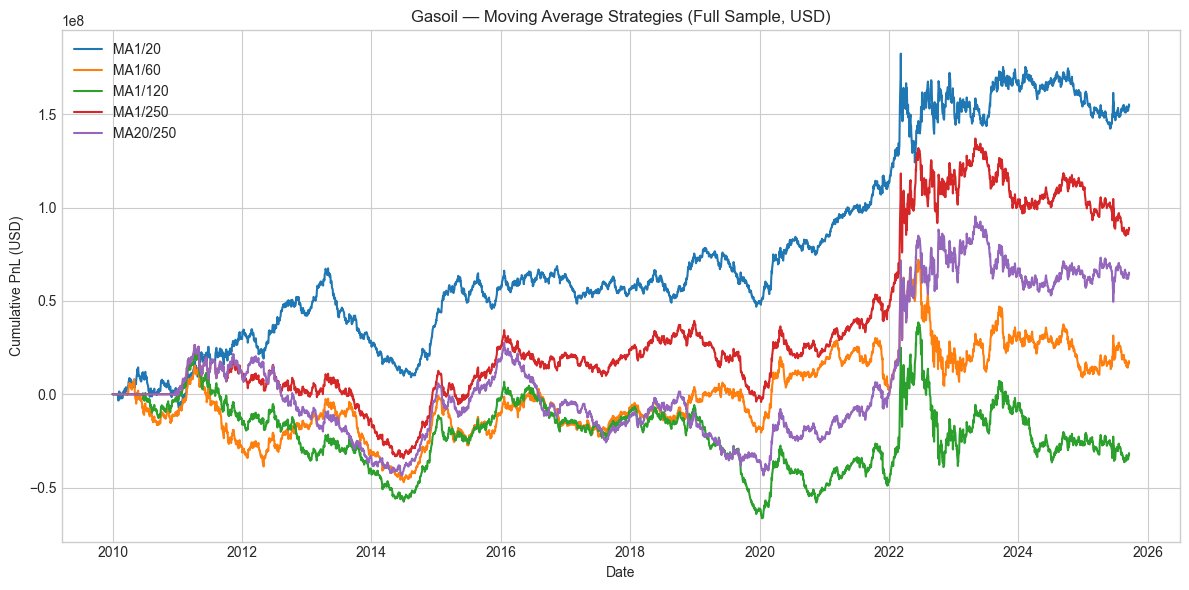

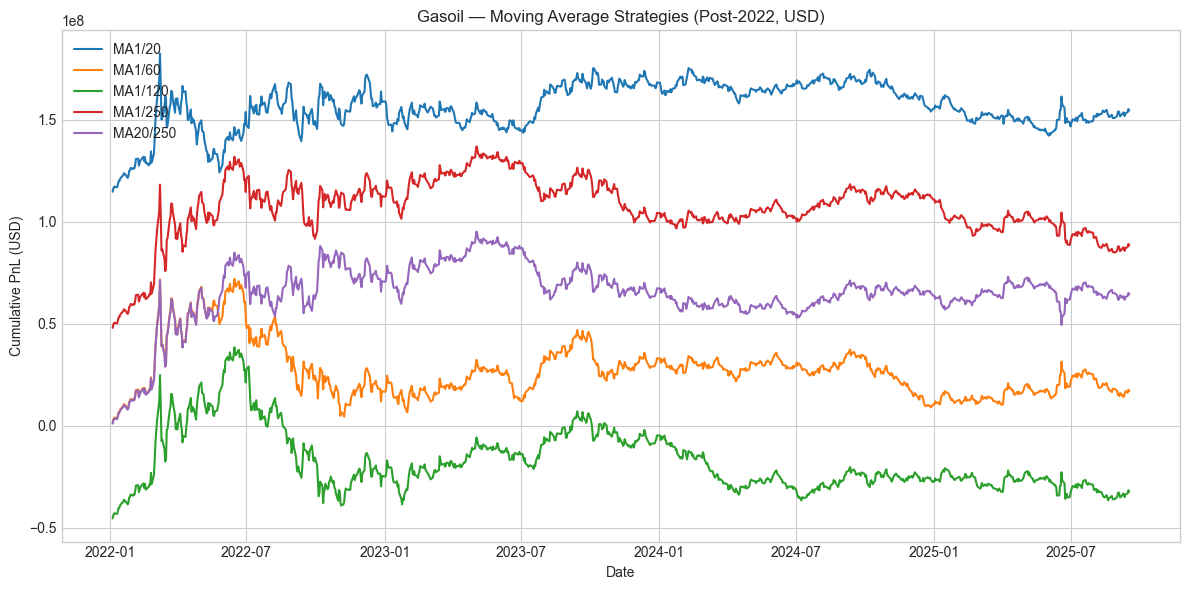

----- Gasoil — MA Strategy Metrics (Full / Pre / Post, USD) -----

MA1/20



MA1/60



MA1/120



MA1/250



MA20/250


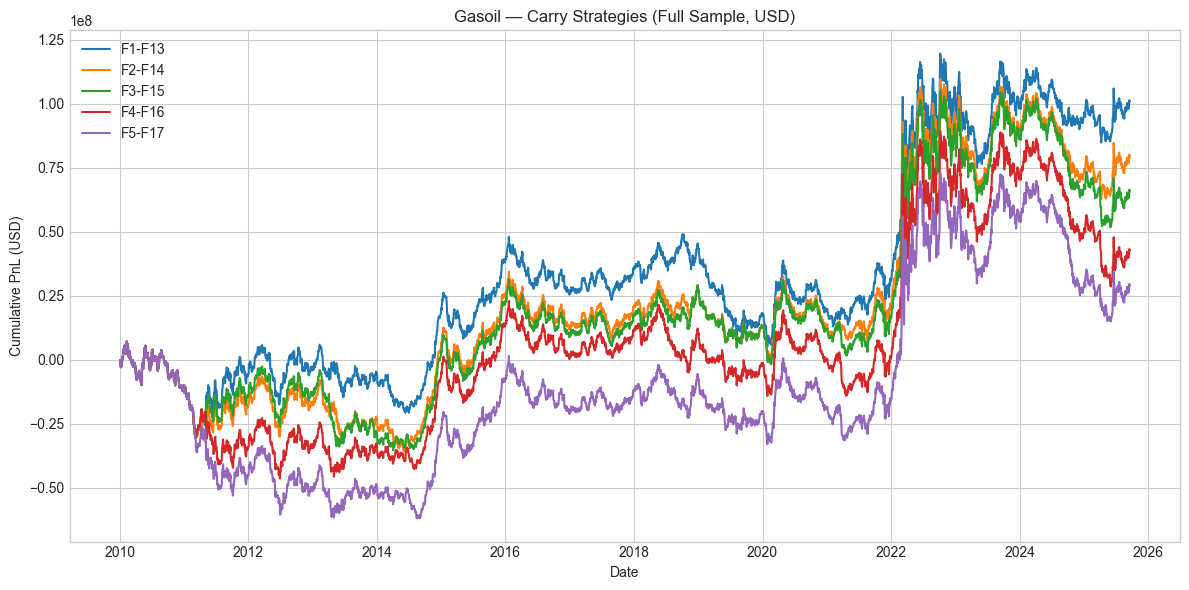

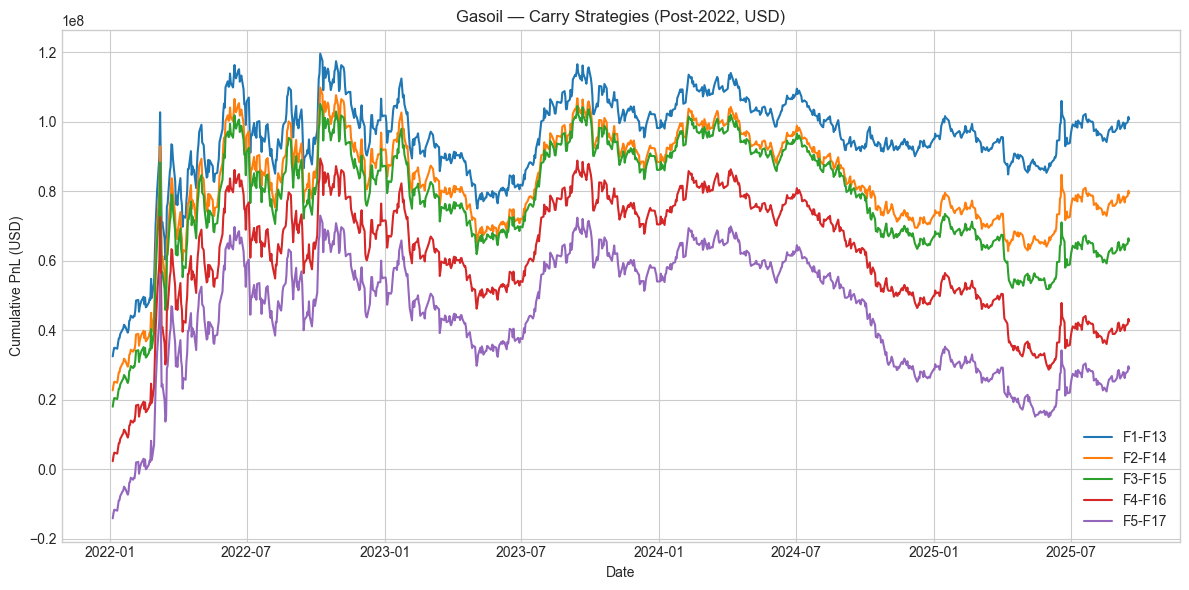

----- Gasoil — Carry Strategy Metrics (Full / Pre / Post, USD) -----

F1-F13



F2-F14



F3-F15



F4-F16



F5-F17


===== Completed Gasoil (QS) =====


=== Natgas (NG) | t_cost=0.001 ===
Found sheet 'Natgas (NG)' for NG


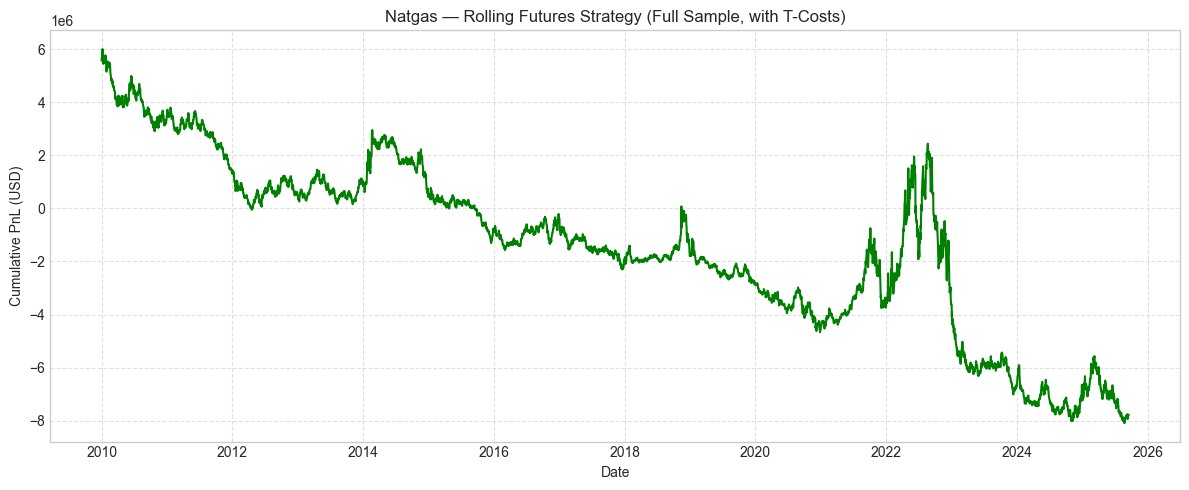

----- Natgas — Rolling Futures Metrics (Full Sample, USD) -----


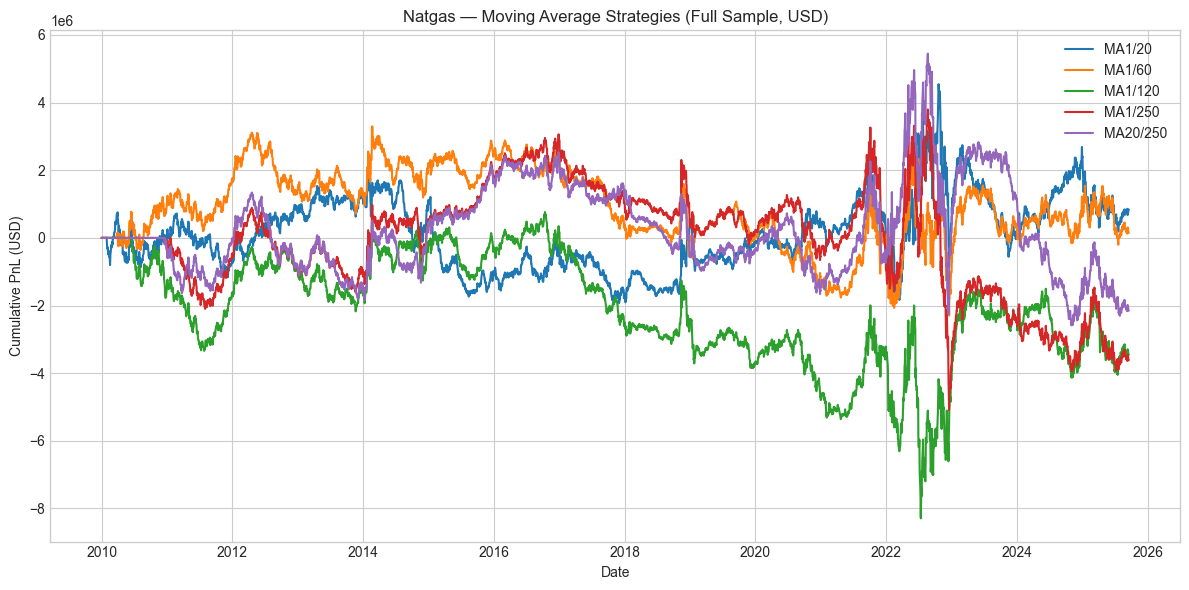

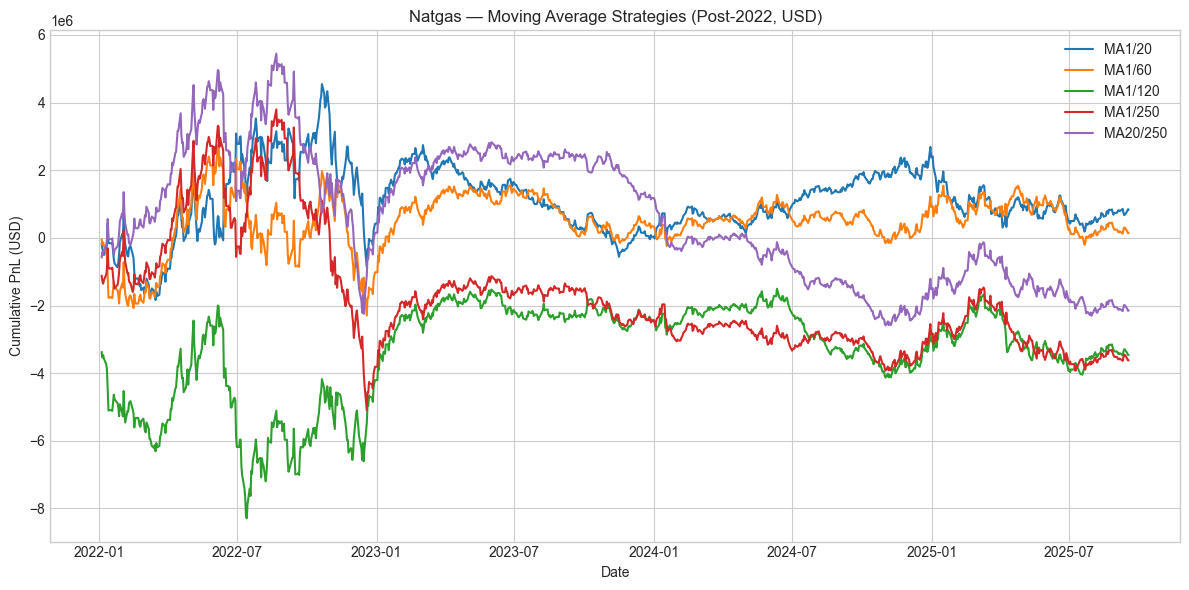

----- Natgas — MA Strategy Metrics (Full / Pre / Post, USD) -----

MA1/20



MA1/60



MA1/120



MA1/250



MA20/250


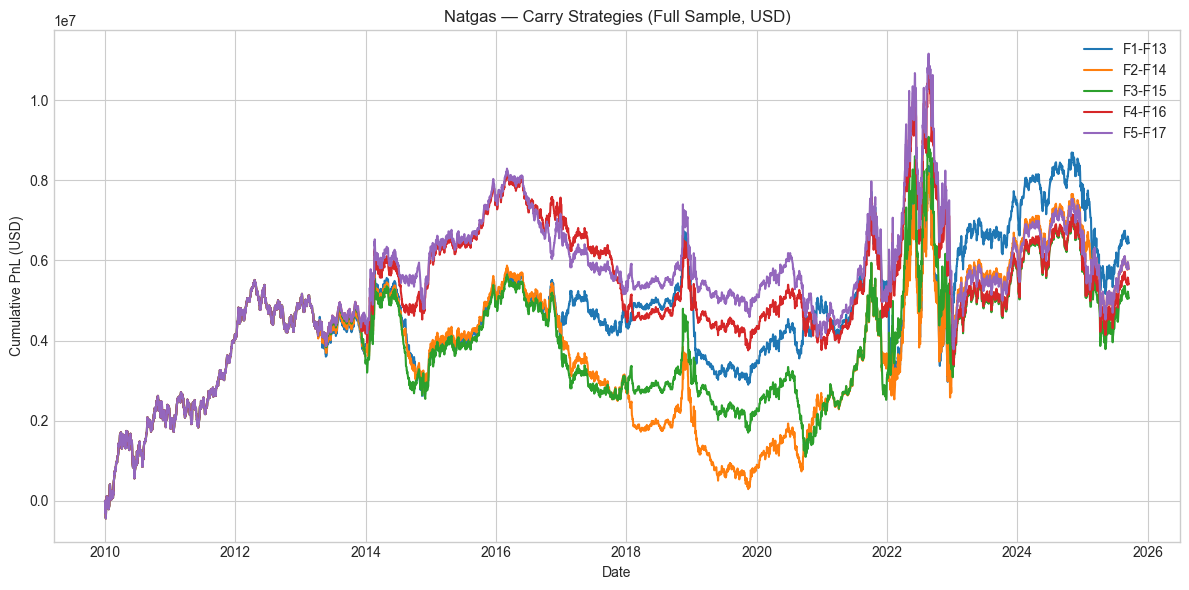

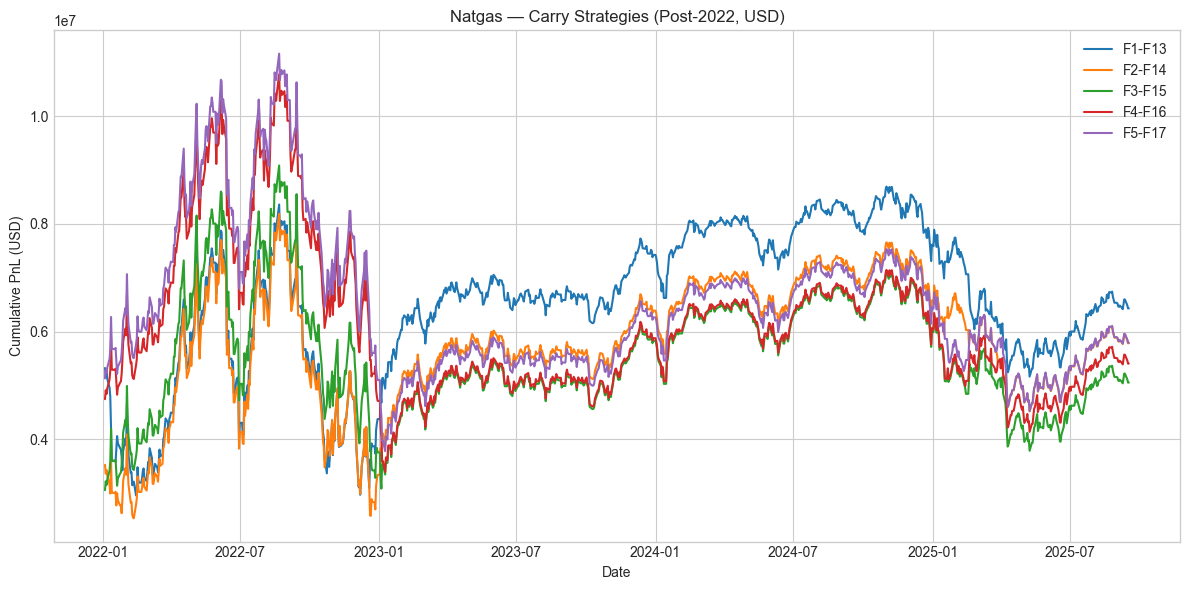

----- Natgas — Carry Strategy Metrics (Full / Pre / Post, USD) -----

F1-F13



F2-F14



F3-F15



F4-F16



F5-F17


===== Completed Natgas (NG) =====




In [24]:

for commodity_name, (ticker, contracts, units, t_cost) in COMMODITIES.items():
    print("=" * 80)
    print(f"=== {commodity_name} ({ticker}) | t_cost={t_cost} ===")
    print("=" * 80)

    # --- Load data robustly ---
    try:
        prices_df = read_data(data_path, sheet=ticker)
    except ValueError:
        xls = pd.ExcelFile(data_path)
        match = [s for s in xls.sheet_names if ticker in s or ticker.strip() in s]
        if not match:
            raise ValueError(f"No worksheet found for {ticker} in {data_path}. Sheets found: {xls.sheet_names}")
        sheet_name = match[0]
        print(f"Found sheet '{sheet_name}' for {ticker}")
        prices_df = read_data(data_path, sheet=sheet_name)

    expiry = expiry_calendar(ticker, calendar_path=calendar_path)

    # --- Rolling baseline ---
    roll = RollingStrategy(prices_df, expiry, front_col="F1", next_col="F2")
    rolled_raw = roll.pnl(roll_window=roll_window)
    rolled_df = roll.equity(roll_window=roll_window, t_cost=t_cost)

    # --- SCALE EQUITY & PnL TO DOLLARS ---
    scale = contracts * units
    rolled_df["equity_dollar"] = rolled_df["equity_line"] * scale
    rolled_df["net_pnl_dollar"] = rolled_df["net_pnl"] * scale

    # --- Plot full-sample equity line (scaled) ---
    plt.figure(figsize=(12, 5))
    plt.plot(rolled_df.index, rolled_df["equity_dollar"], color="green", linewidth=1.5)
    plt.title(f"{commodity_name} — Rolling Futures Strategy (Full Sample, with T-Costs)")
    plt.xlabel("Date")
    plt.ylabel("Cumulative PnL (USD)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

    # --- Rolling metrics (in dollars) ---
    print(f"----- {commodity_name} — Rolling Futures Metrics (Full Sample, USD) -----")
    m_full = roll.metrics(contracts=contracts, units=units)
    display(m_full.to_frame().T.style.set_table_styles(
        [{"selector": "th", "props": [("font-weight", "bold")]}]
    ))

    # -----------------------------------------------------------------
    # 1) MOVING AVERAGE STRATEGIES
    # -----------------------------------------------------------------
    ma_params = [(1, 20), (1, 60), (1, 120), (1, 250), (20, 250)]
    ma_results = {}

    plt.figure(figsize=(12, 6))
    for short_ma, long_ma in ma_params:
        df_ma = momentum(
            prices=prices_df,
            rolled_df=rolled_raw,
            front_col="F1",
            short_ma=short_ma,
            long_ma=long_ma,
            t_cost=t_cost,
            epsilon=0.00,
        )

        # --- Scale to dollars ---
        df_ma["equity_dollar"] = df_ma["equity_line"] * scale
        df_ma["net_pnl_dollar"] = df_ma["net_pnl"] * scale

        name = f"MA{short_ma}/{long_ma}"
        ma_results[name] = df_ma
        plt.plot(df_ma.index, df_ma["equity_dollar"], label=name)

    plt.title(f"{commodity_name} — Moving Average Strategies (Full Sample, USD)")
    plt.xlabel("Date"); plt.ylabel("Cumulative PnL (USD)")
    plt.legend(); plt.tight_layout(); plt.show()

    # --- Post-2022 chart ---
    plt.figure(figsize=(12, 6))
    for name, df in ma_results.items():
        df_post = df.loc[df.index >= cutoff]
        plt.plot(df_post.index, df_post["equity_dollar"], label=name)
    plt.title(f"{commodity_name} — Moving Average Strategies (Post-2022, USD)")
    plt.xlabel("Date"); plt.ylabel("Cumulative PnL (USD)")
    plt.legend(); plt.tight_layout(); plt.show()

    # --- Metrics boxes (Full / Pre / Post) ---
    print(f"----- {commodity_name} — MA Strategy Metrics (Full / Pre / Post, USD) -----")
    for name, df in ma_results.items():
        df_pre  = df.loc[df.index < cutoff]
        df_post = df.loc[df.index >= cutoff]

        m_full = metrics(df, contracts=contracts, units=units)
        m_pre  = metrics(df_pre, contracts=contracts, units=units)
        m_post = metrics(df_post, contracts=contracts, units=units)

        box = pd.concat(
            [m_full.to_frame().T, m_pre.to_frame().T, m_post.to_frame().T],
            keys=["Full Sample", "Pre-2022", "Post-2022"],
        )
        print(f"\n{name}")
        display(box.style.set_table_styles(
            [{"selector": "th", "props": [("font-weight", "bold")]}]
        ))

    # -----------------------------------------------------------------
    # 2) CARRY STRATEGIES
    # -----------------------------------------------------------------
    carry_pairs = [(1, 13), (2, 14), (3, 15), (4, 16), (5, 17)]
    carry_results = {}

    plt.figure(figsize=(12, 6))
    for f1, f2 in carry_pairs:
        df_carry = carry(
            prices=prices_df,
            rolled_df=rolled_raw,
            front_col=f"F{f1}",
            end_col=f"F{f2}",
            t_cost=t_cost,
            epsilon=0.00,
        )

        # --- Scale to dollars ---
        df_carry["equity_dollar"] = df_carry["equity_line"] * scale
        df_carry["net_pnl_dollar"] = df_carry["net_pnl"] * scale

        name = f"F{f1}-F{f2}"
        carry_results[name] = df_carry
        plt.plot(df_carry.index, df_carry["equity_dollar"], label=name)

    plt.title(f"{commodity_name} — Carry Strategies (Full Sample, USD)")
    plt.xlabel("Date"); plt.ylabel("Cumulative PnL (USD)")
    plt.legend(); plt.tight_layout(); plt.show()

    # --- Post-2022 chart ---
    plt.figure(figsize=(12, 6))
    for name, df in carry_results.items():
        df_post = df.loc[df.index >= cutoff]
        plt.plot(df_post.index, df_post["equity_dollar"], label=name)
    plt.title(f"{commodity_name} — Carry Strategies (Post-2022, USD)")
    plt.xlabel("Date"); plt.ylabel("Cumulative PnL (USD)")
    plt.legend(); plt.tight_layout(); plt.show()

    # --- Metrics boxes (Full / Pre / Post) ---
    print(f"----- {commodity_name} — Carry Strategy Metrics (Full / Pre / Post, USD) -----")
    for name, df in carry_results.items():
        df_pre  = df.loc[df.index < cutoff]
        df_post = df.loc[df.index >= cutoff]

        m_full = metrics(df, contracts=contracts, units=units)
        m_pre  = metrics(df_pre, contracts=contracts, units=units)
        m_post = metrics(df_post, contracts=contracts, units=units)

        box = pd.concat(
            [m_full.to_frame().T, m_pre.to_frame().T, m_post.to_frame().T],
            keys=["Full Sample", "Pre-2022", "Post-2022"],
        )
        print(f"\n{name}")
        display(box.style.set_table_styles(
            [{"selector": "th", "props": [("font-weight", "bold")]}]
        ))

    print(f"===== Completed {commodity_name} ({ticker}) =====\n\n")
